In [183]:
!pip install statsmodels==0.13.5

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [184]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report  #plot_confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

### Datos


El set de datos `Carseats`, accesible en Python a través de `statsmodels.datasets.get_rdataset`, contiene información sobre:

- La venta de sillas de seguridad infantiles en 400 tiendas distintas. 
- Para cada una de las 400 tiendas se han registrado 11 variables. 

**objetivo:** Generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas `(Sales > 8)` o `bajas (Sales <= 8)` en función de todas las variables disponibles.

In [185]:
carseats = sm.datasets.get_rdataset("Carseats", "ISLR")
datos = carseats.data
print(carseats.__doc__)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: sales-of-child-car-seats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``,

In [186]:
datos.head(5)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [187]:
datos.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(400, 11)

In [188]:
datos.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [189]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
import sweetviz as sw

In [191]:
reporte=sw.analyze(datos, target_feat="Sales")

/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.9/dist-packages/s

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




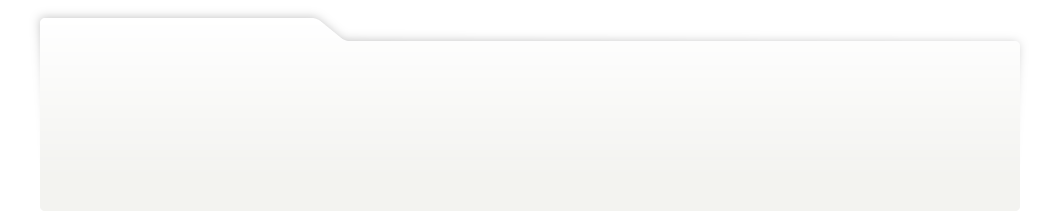
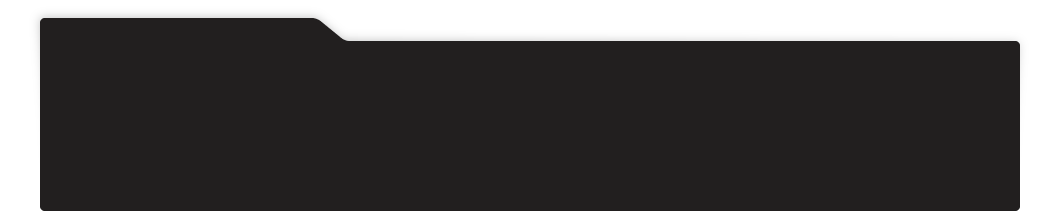
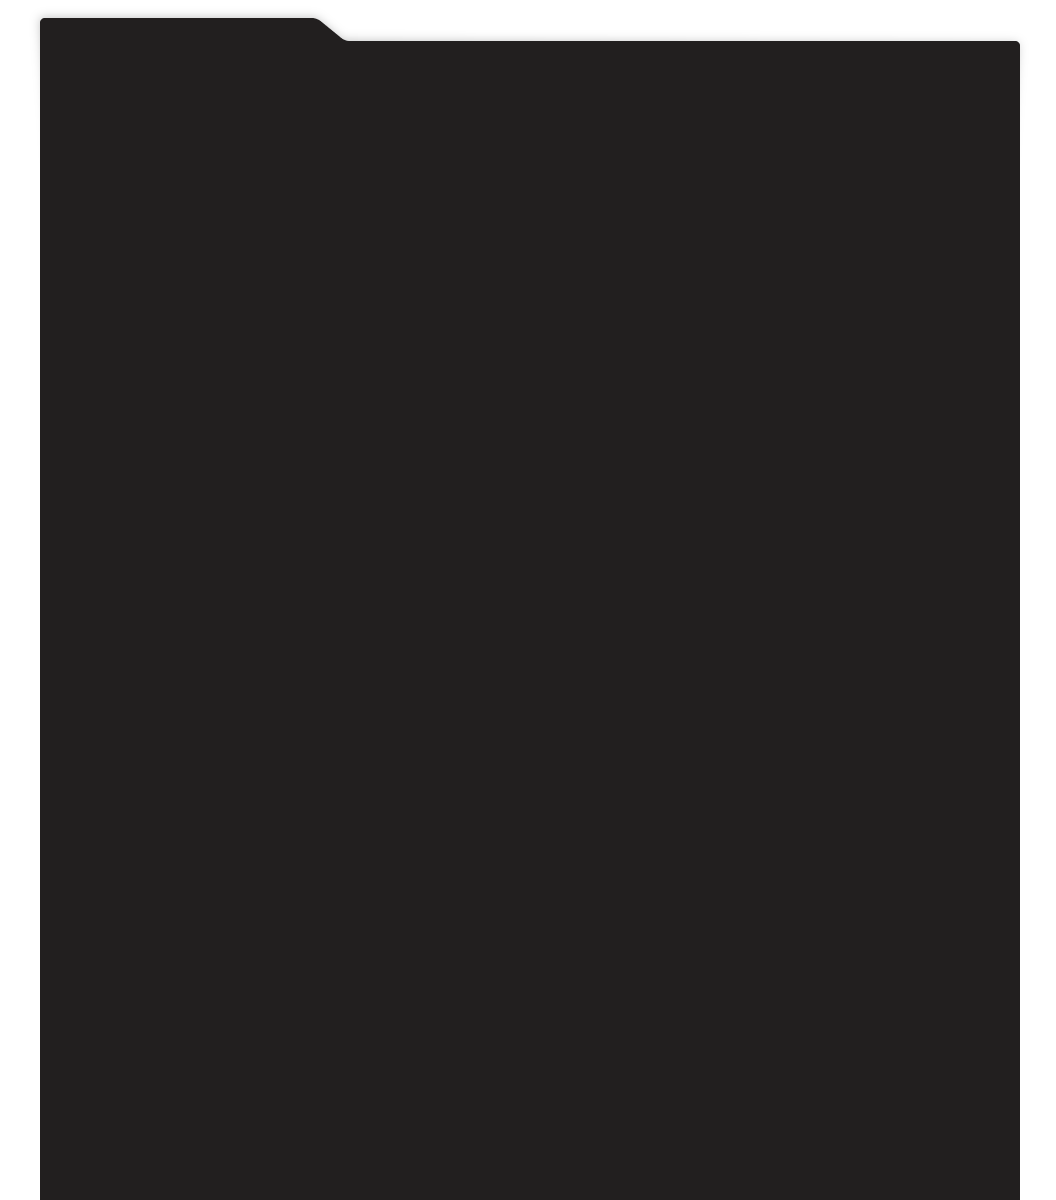
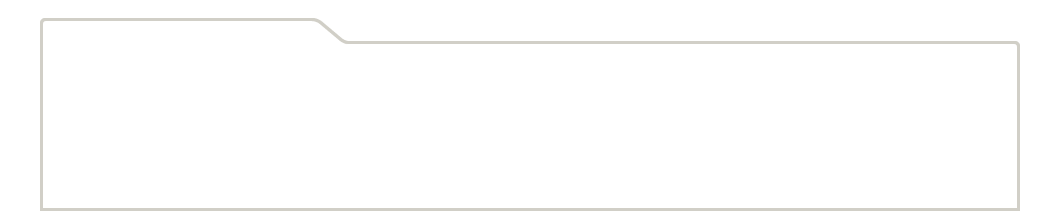
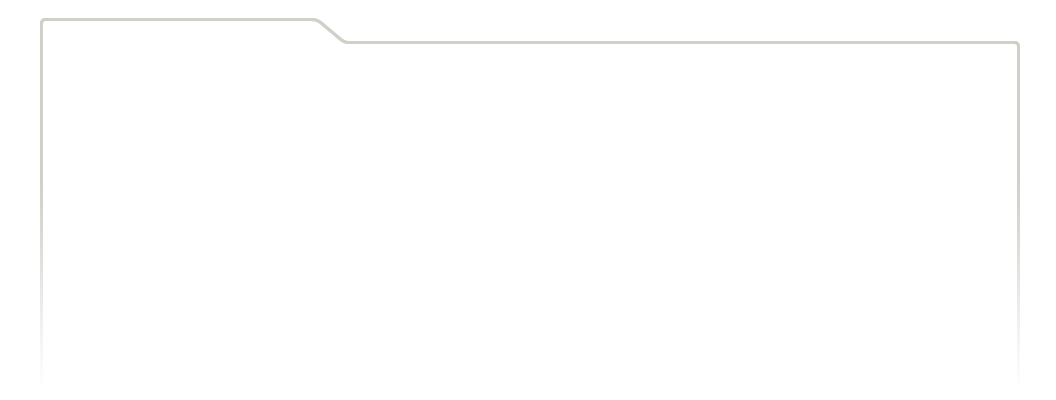
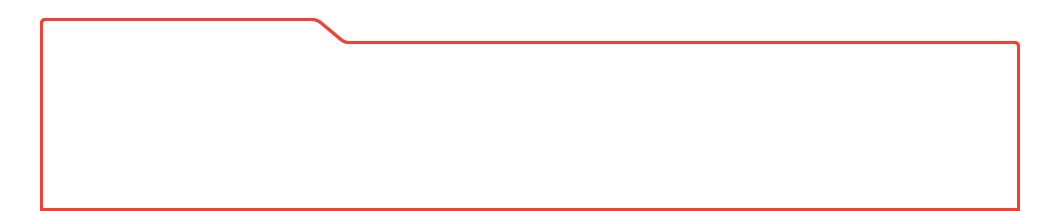
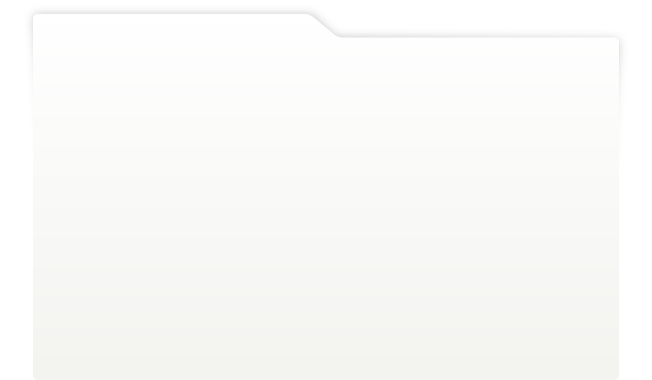
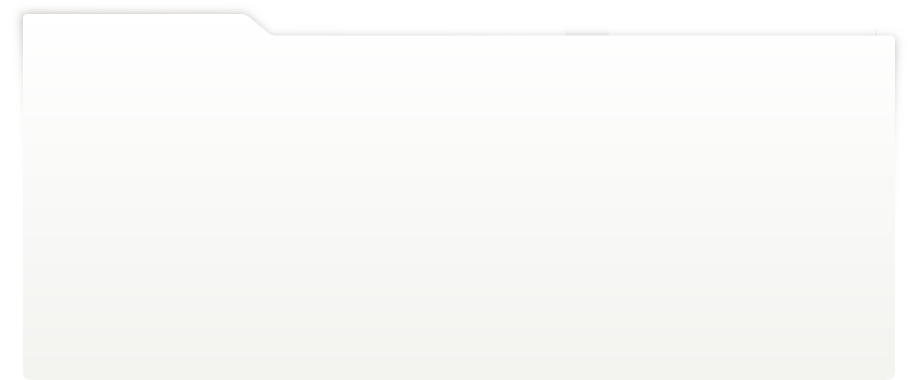
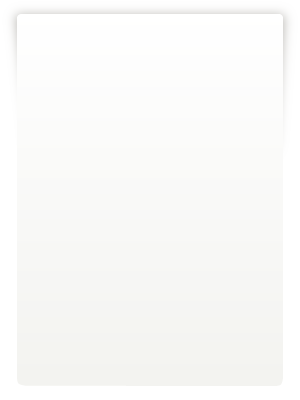
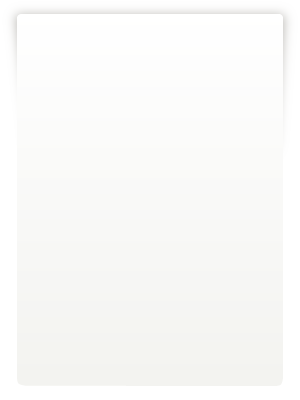
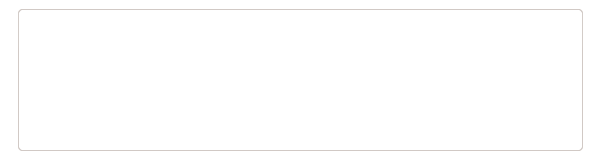
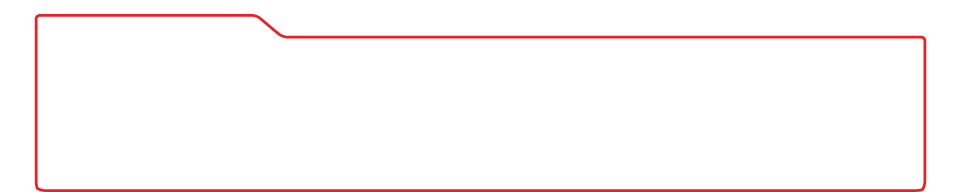
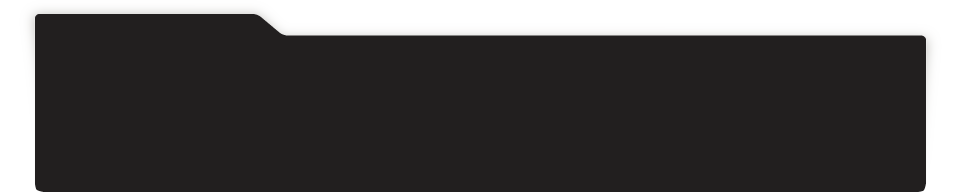
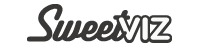
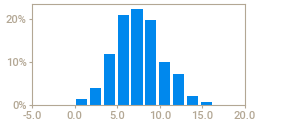
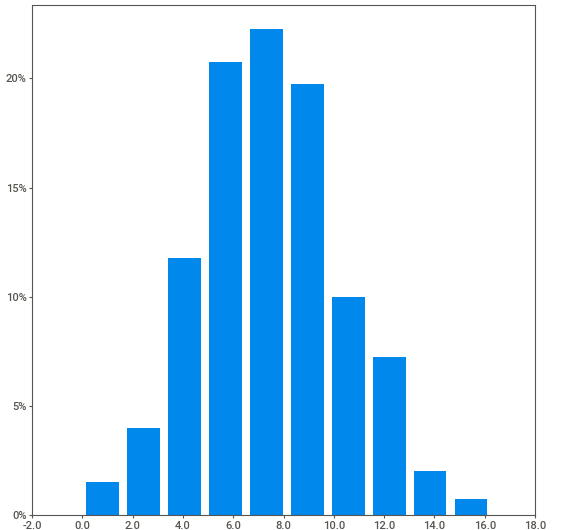
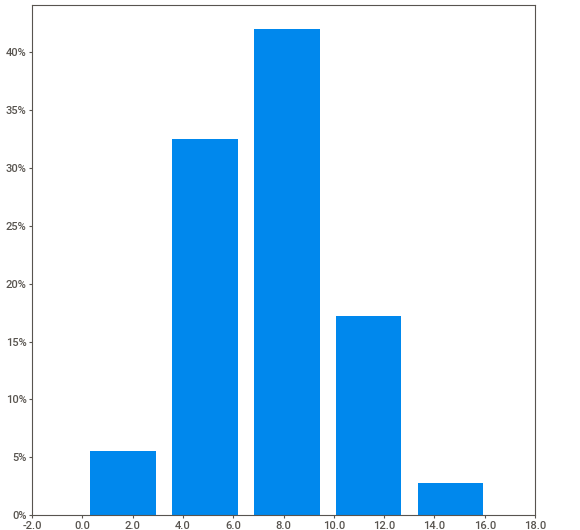
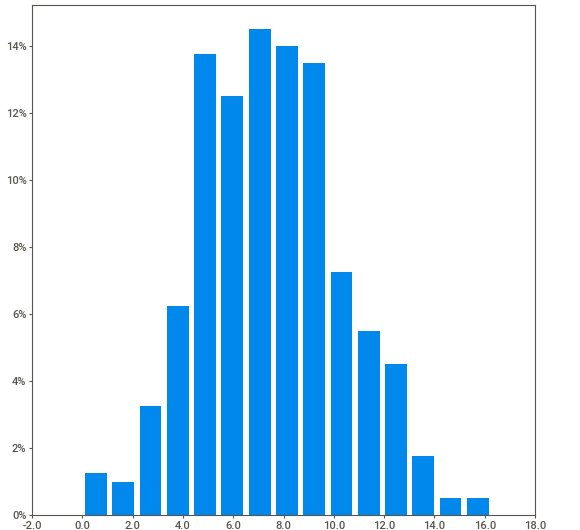
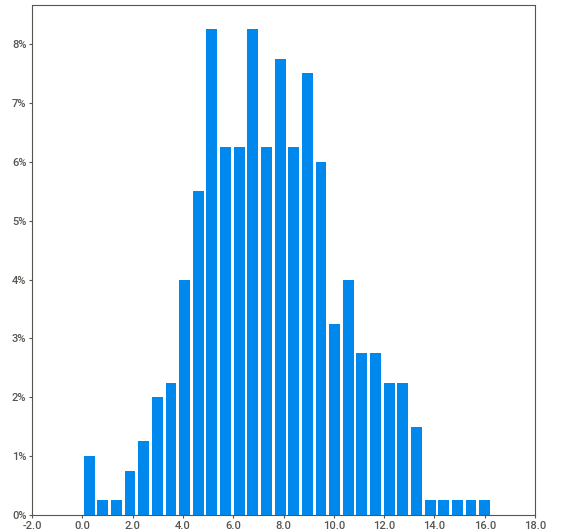
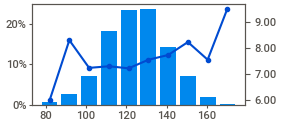
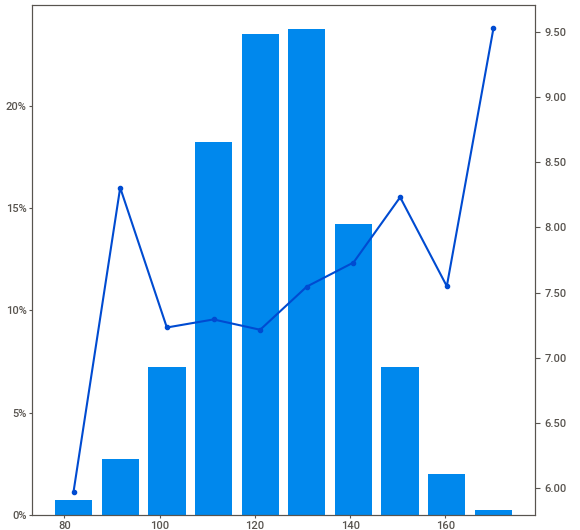
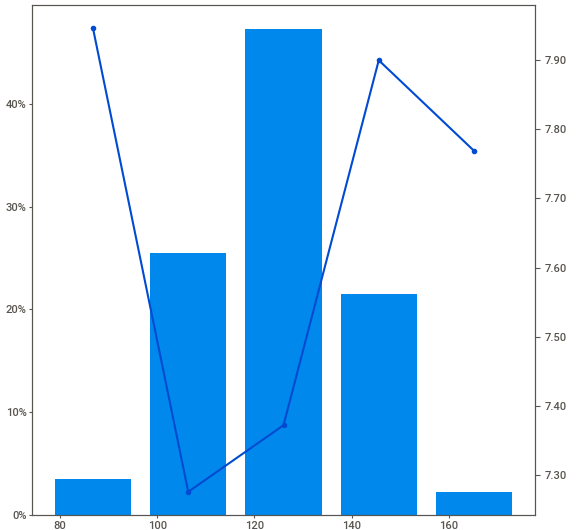
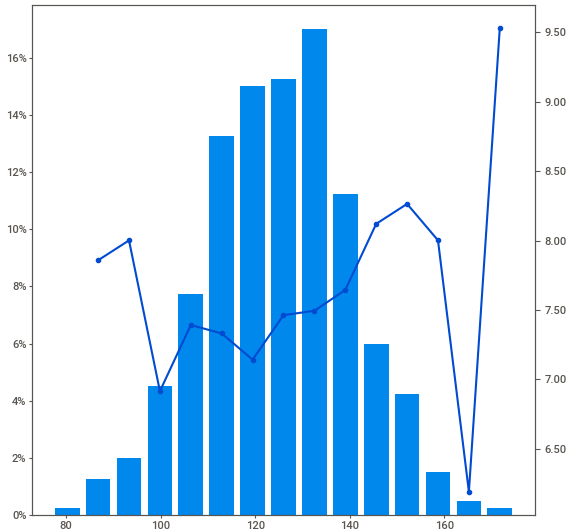
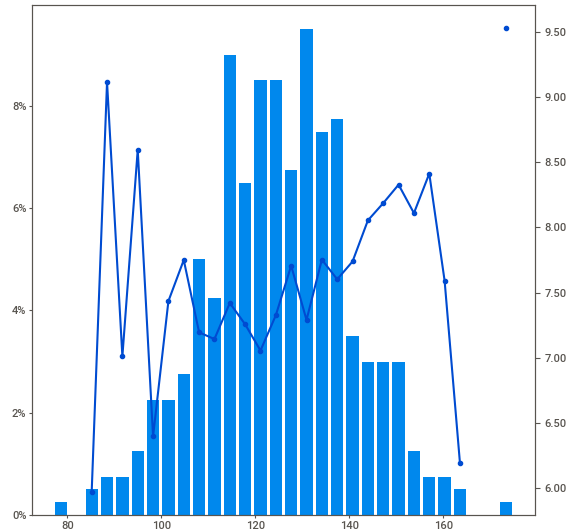
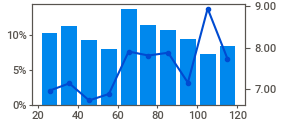
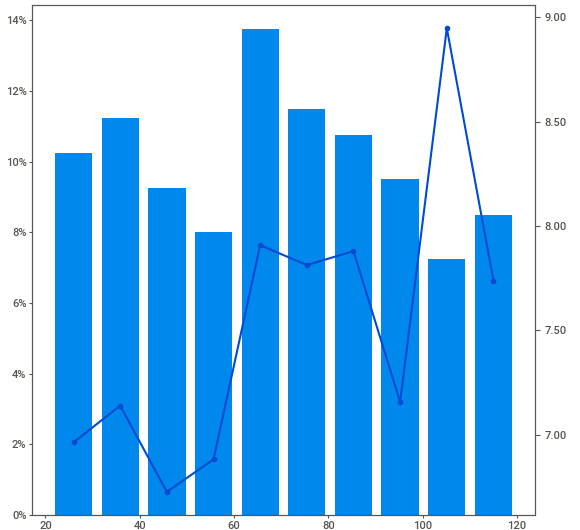
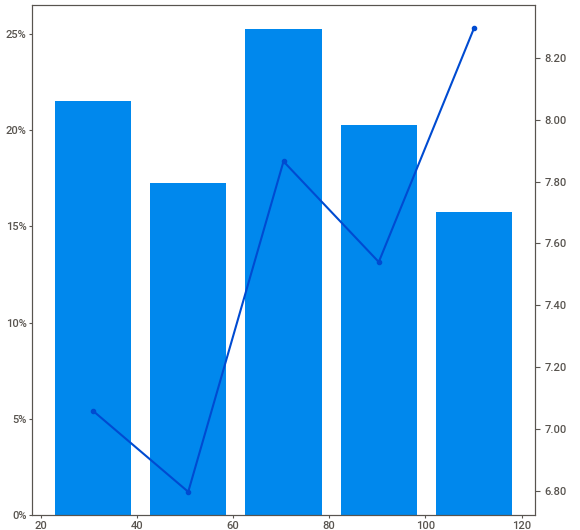
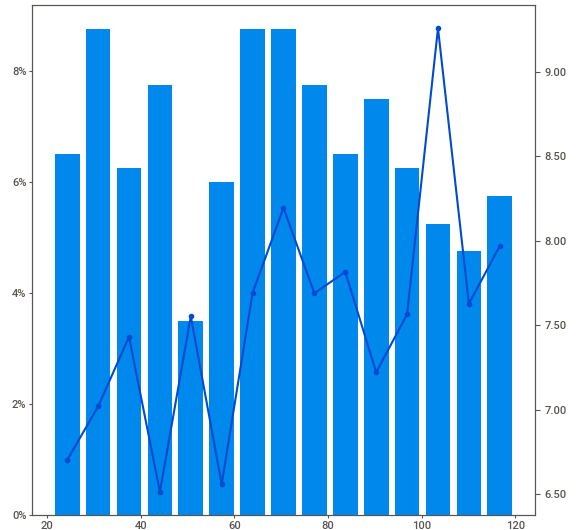
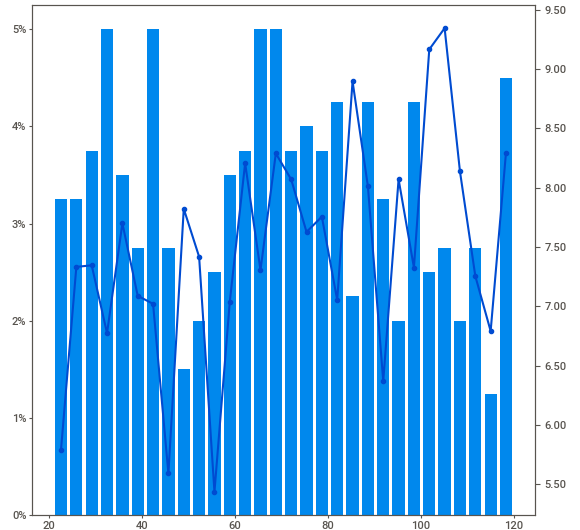
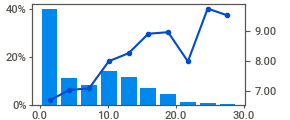
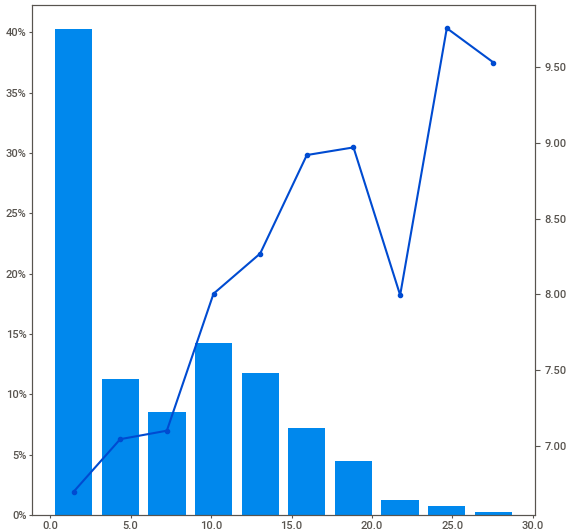
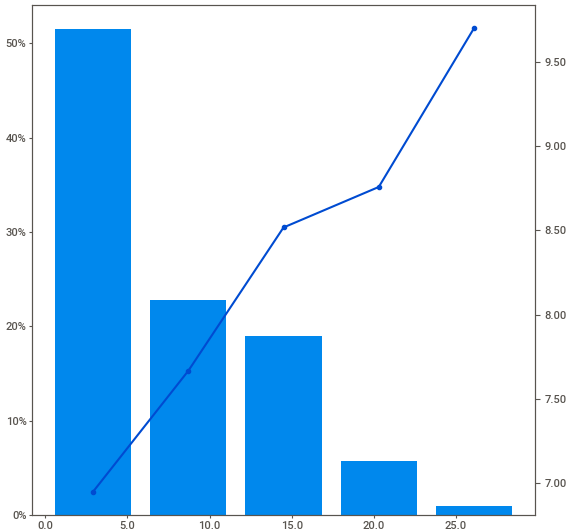
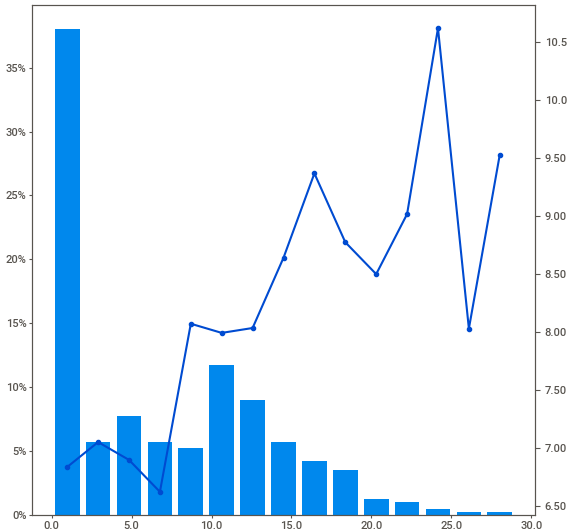
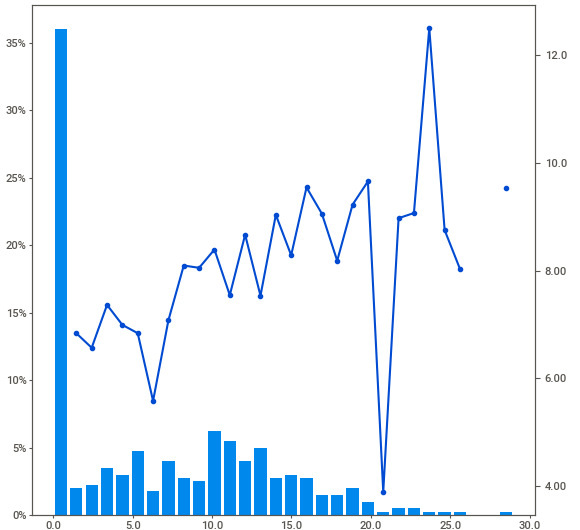
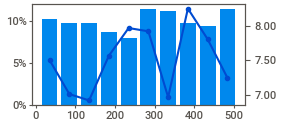
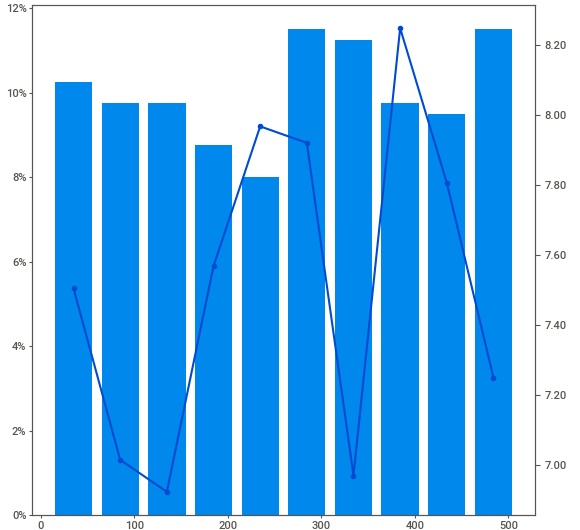
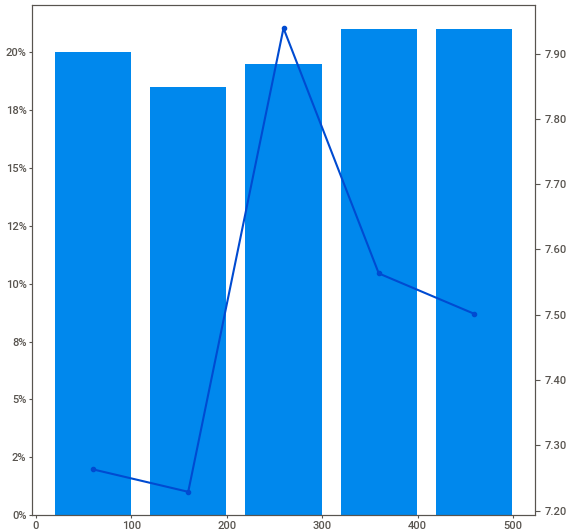
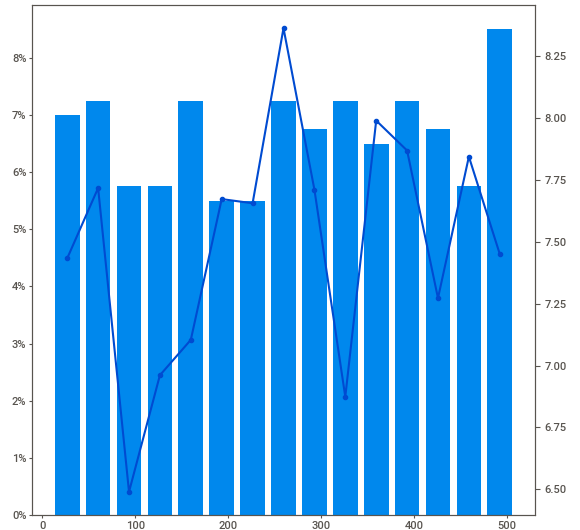
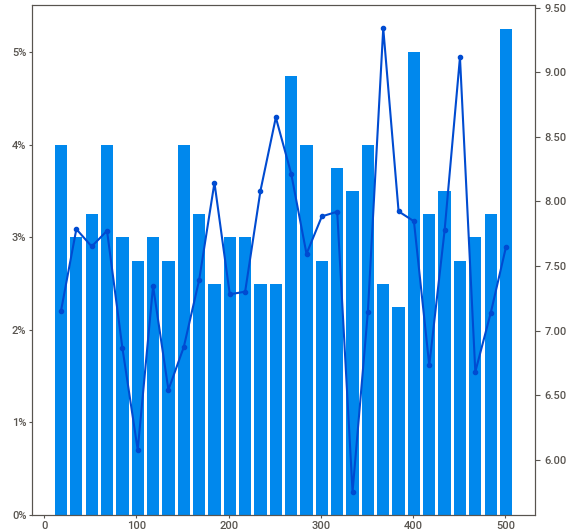
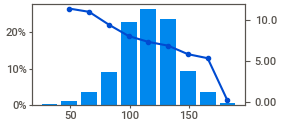
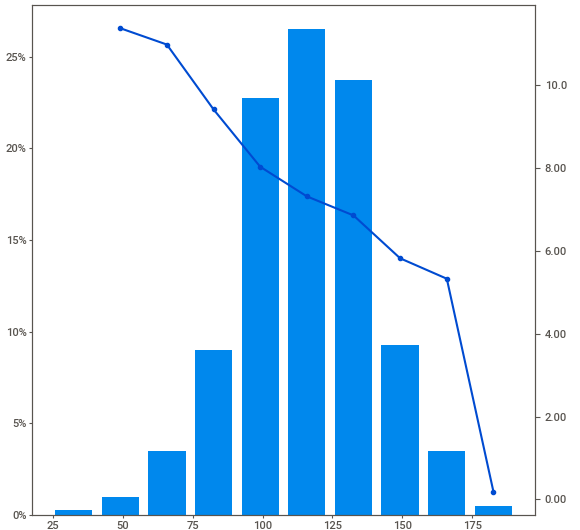
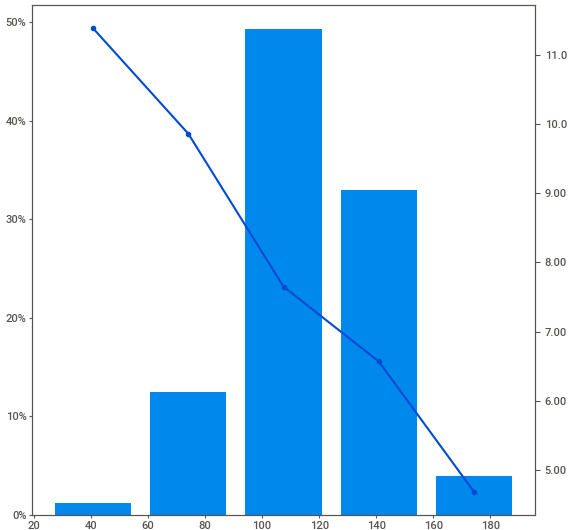
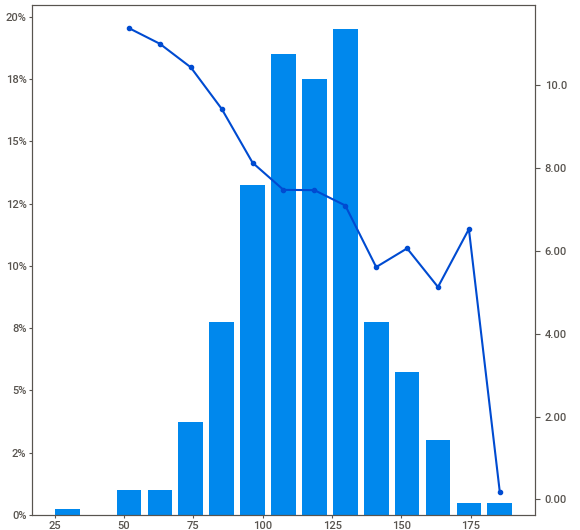
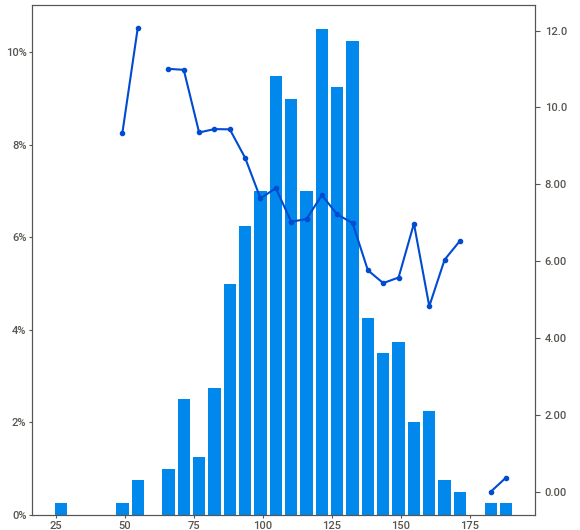
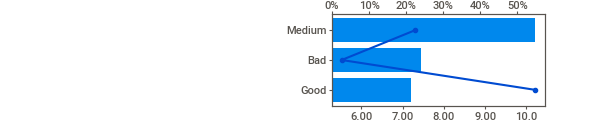
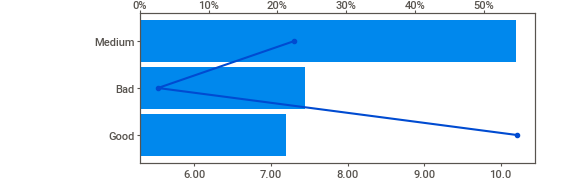
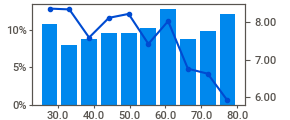
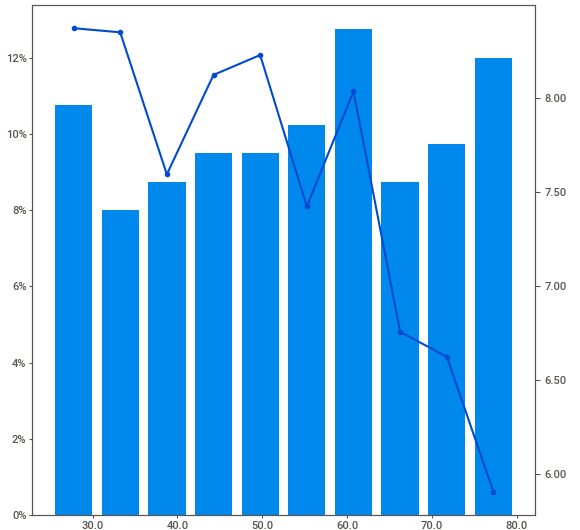
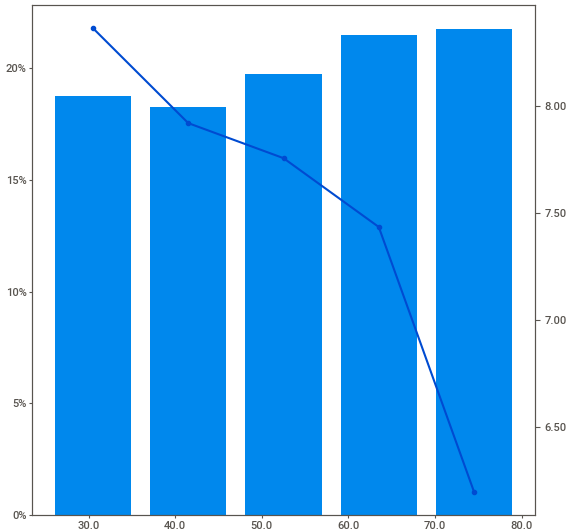
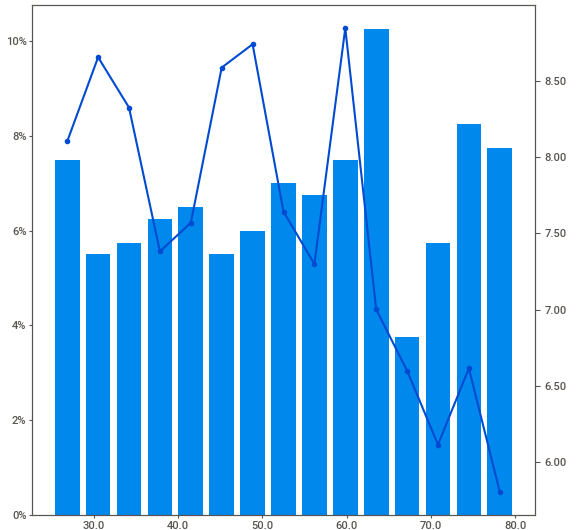
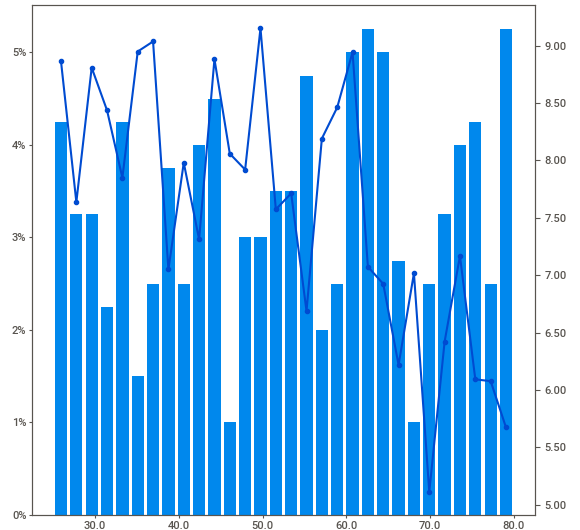
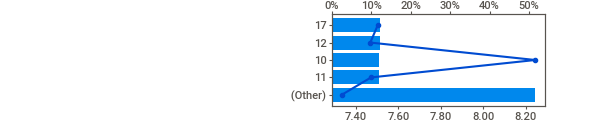
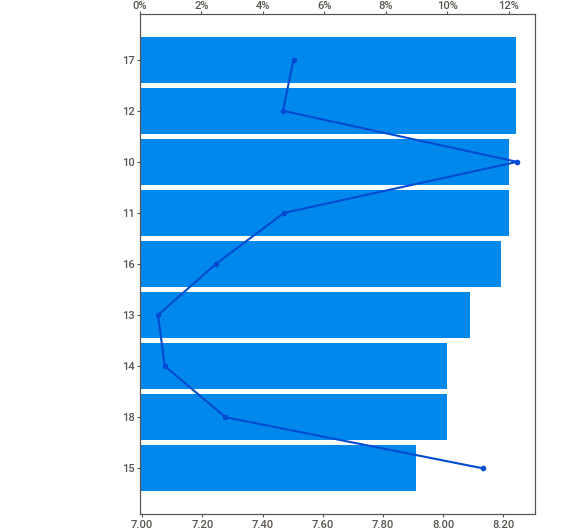
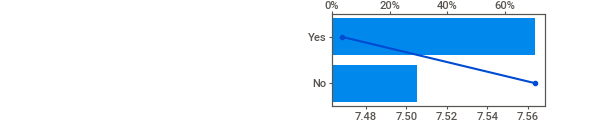
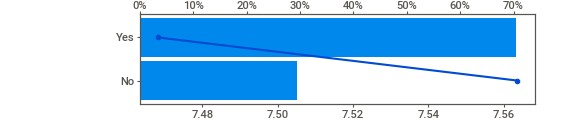
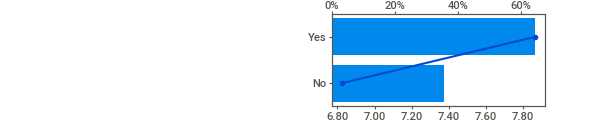
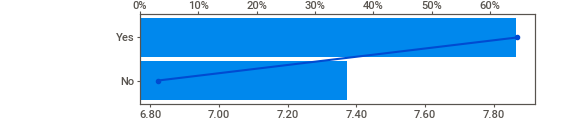
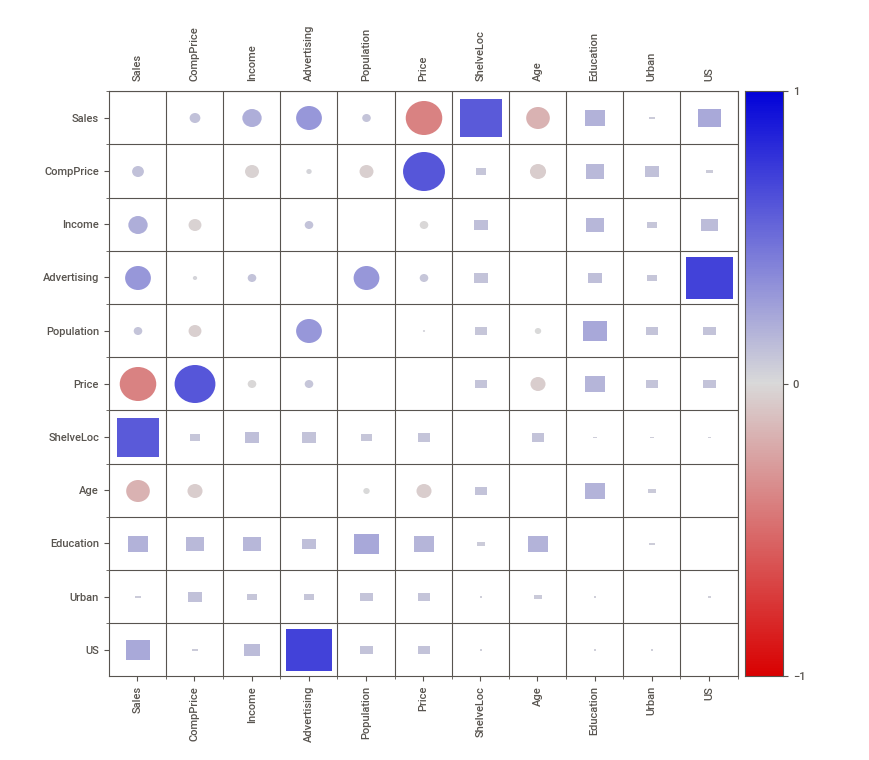
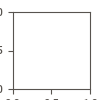

In [192]:
from IPython.display import HTML
reporte.show_html()
HTML("SWEETVIZ_REPORT.html")

In [193]:
HTML("Report SWEETVIZ_REPORT.html")

<Axes: xlabel='Price', ylabel='Sales'>

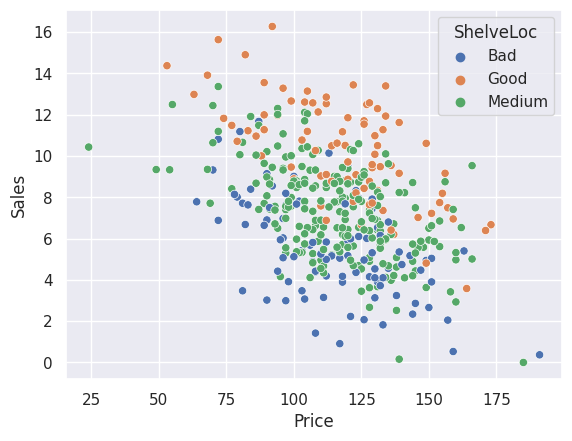

In [194]:
import seaborn as sns
sns.set_theme()
sns.scatterplot(data=datos, x="Price", y='Sales', hue='ShelveLoc')


In [195]:
datos.columns

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

<Axes: xlabel='Price', ylabel='CompPrice'>

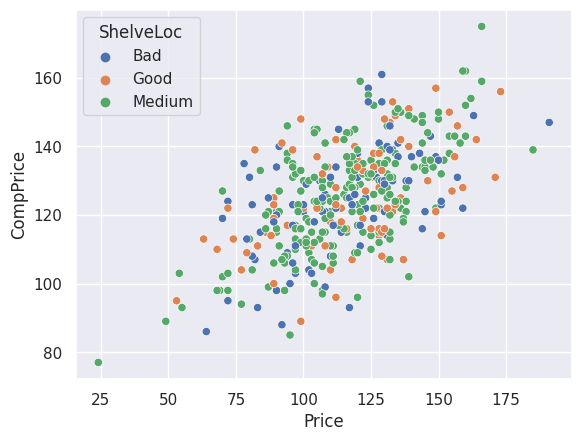

In [196]:
import seaborn as sns
sns.set_theme()
sns.scatterplot(data=datos, x="Price", y='CompPrice', hue='ShelveLoc')


In [197]:
?px.scatter

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [198]:
px.scatter(data_frame=datos, x="Price", y="CompPrice", color="ShelveLoc",  symbol="Urban")

In [199]:
A=datos.corr()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-199-065cf5772955>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

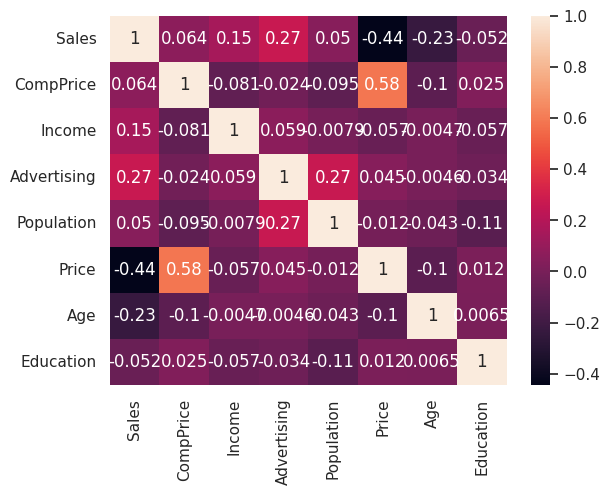

In [200]:
sns.heatmap(A, annot=True)

In [201]:
datos.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [202]:
px.box(data_frame=datos, y="Sales", color="ShelveLoc", points="all", title="Box plot")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



`Sales` es una variable continua y el objetivo del estudio es clasificar las tiendas según si venden mucho o poco, se crea una nueva variable dicotómica (0, 1) llamada `ventas_altas`.

In [203]:
datos['ventas_altas'] = np.where(datos.Sales > 8, 1, 0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [204]:
datos

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  ventas_altas  
0           17   Yes  Yes             1  
1           10   Yes  Yes             1  
2           12   Yes  Yes             1  
3           14   Yes  Yes             0  
4           13   Yes   No             0  
..         ...   ...  ...           ...  
395         14   Yes  Yes             1  
396         11    No  Yes             0  
397         18   Yes  Yes             0  
398         12   Yes  Yes             0  
399         16   Yes  Yes             1  

[400 rows x 12 columns]

- Una vez creada la nueva variable respuesta se descarta la original


In [205]:
datos = datos.drop(columns = 'Sales')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [206]:
datos

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0          138      73           11         276    120       Bad   42   
1          111      48           16         260     83      Good   65   
2          113      35           10         269     80    Medium   59   
3          117     100            4         466     97    Medium   55   
4          141      64            3         340    128       Bad   38   
..         ...     ...          ...         ...    ...       ...  ...   
395        138     108           17         203    128      Good   33   
396        139      23            3          37    120    Medium   55   
397        162      26           12         368    159    Medium   40   
398        100      79            7         284     95       Bad   50   
399        134      37            0          27    120      Good   49   

     Education Urban   US  ventas_altas  
0           17   Yes  Yes             1  
1           10   Yes  Yes             1  
2           12   Yes  Yes             1  
3           14   Yes  Yes             0  
4           13   Yes   No             0  
..         ...   ...  ...           ...  
395         14   Yes  Yes             1  
396         11    No  Yes             0  
397         18   Yes  Yes             0  
398         12   Yes  Yes             0  
399         16   Yes  Yes             1  

[400 rows x 11 columns]

Ejercicio:

Conteo ventas_altas



In [207]:
datos["ventas_altas"].value_counts()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    236
1    164
Name: ventas_altas, dtype: int64

In [208]:
236/400

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.59

<Axes: xlabel='ventas_altas', ylabel='count'>

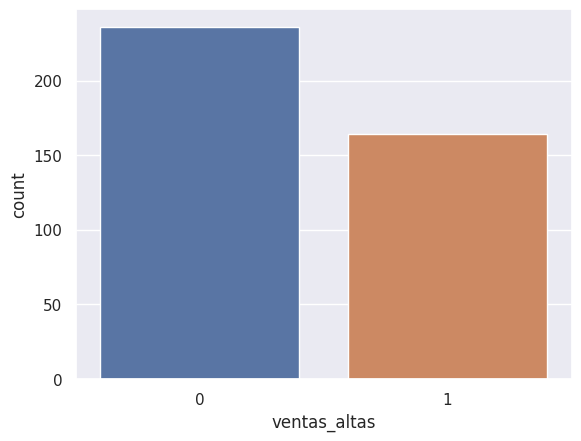

In [209]:
sns.countplot(data=datos, x="ventas_altas")

In [210]:
reporte1=sw.analyze(datos, target_feat="ventas_altas")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.9/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.9/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad

In [211]:
datos1=pd.get_dummies(datos, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [212]:
datos1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ventas_altas  ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0               1               0                 0          1       1  
1               1               1                 0          1       1  
2               1               0                 1          1       1  
3               0               0                 1          1       1  
4               0               0                 0          1       0  
..            ...             ...               ...        ...     ...  
395             1               1                 0          1       1  
396             0               0                 1          0       1  
397             0               0                 1          1       1  
398             0               0                 0          1       1  
399             1               1                 0          1       1  

[400 rows x 12 columns]

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.




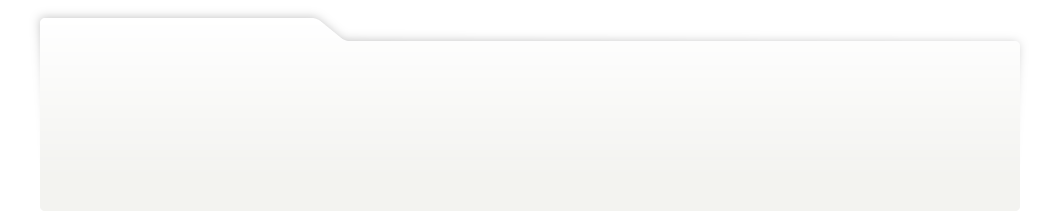
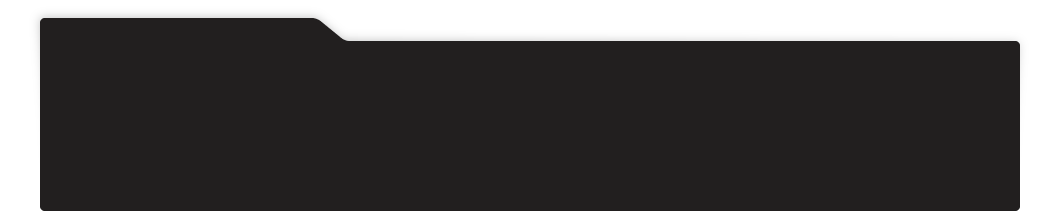
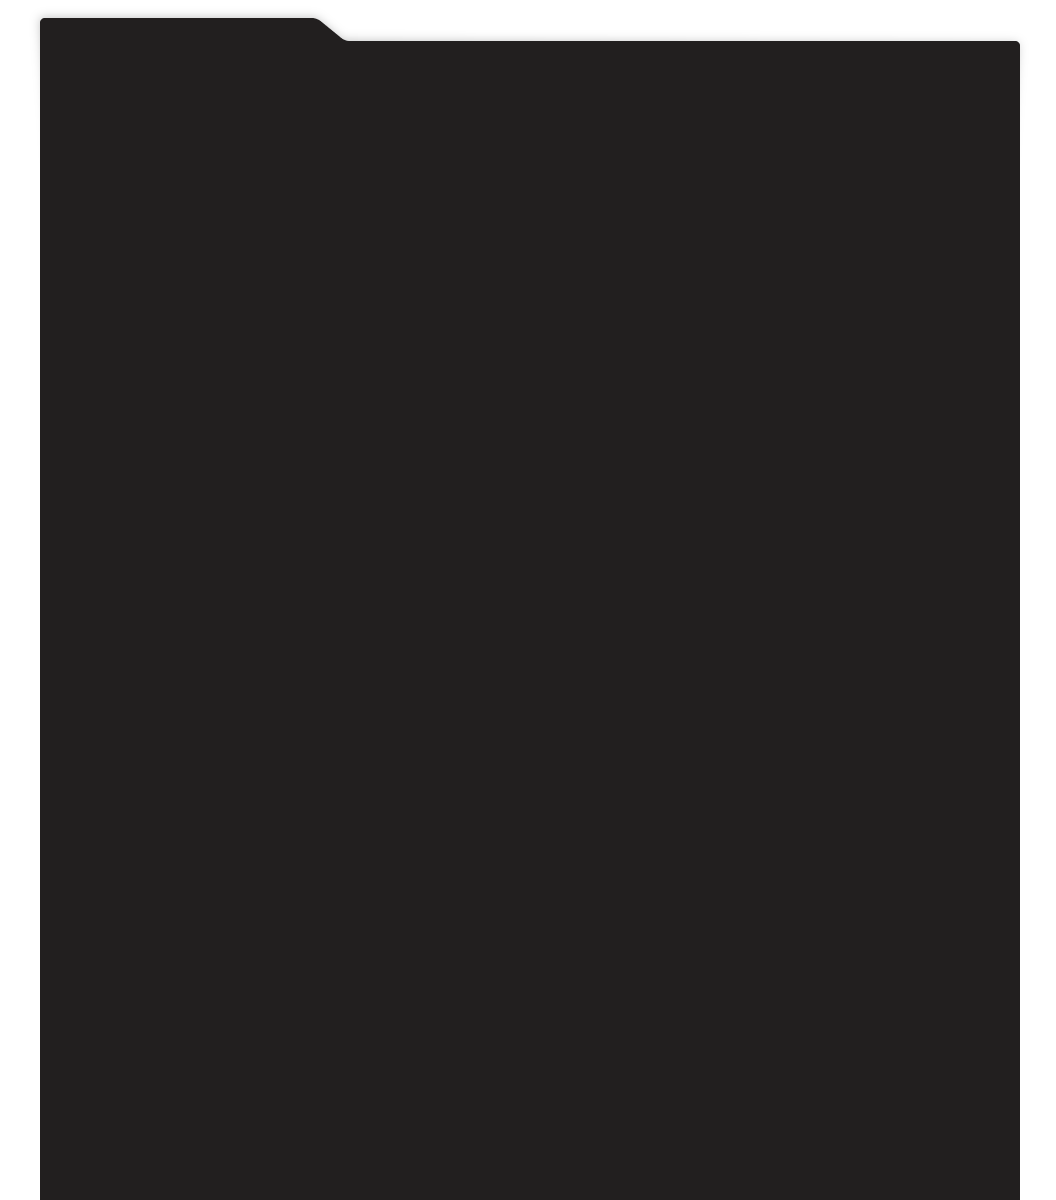
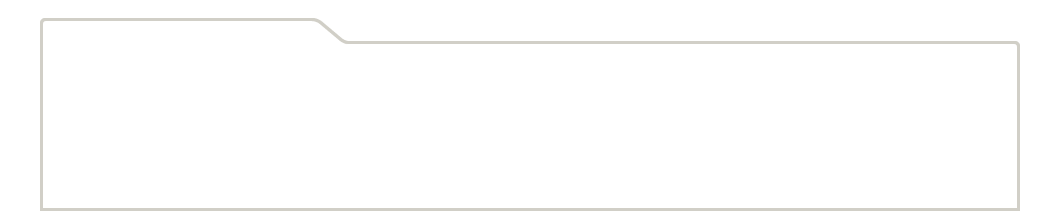
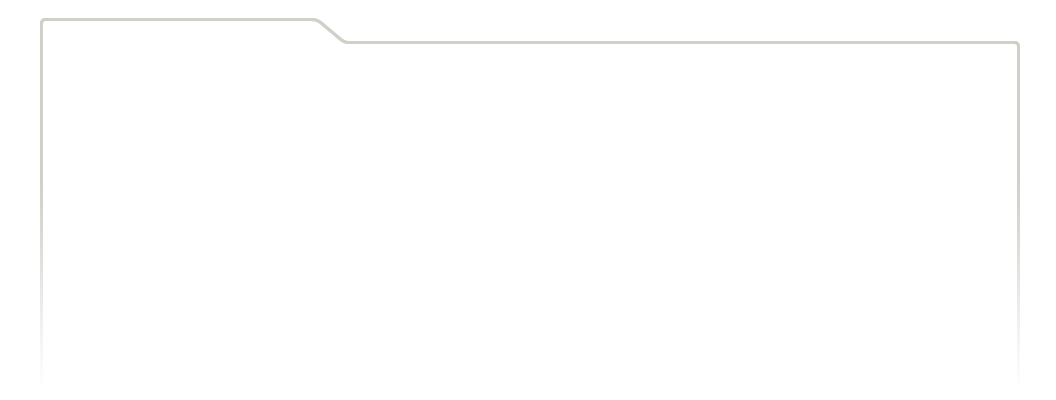
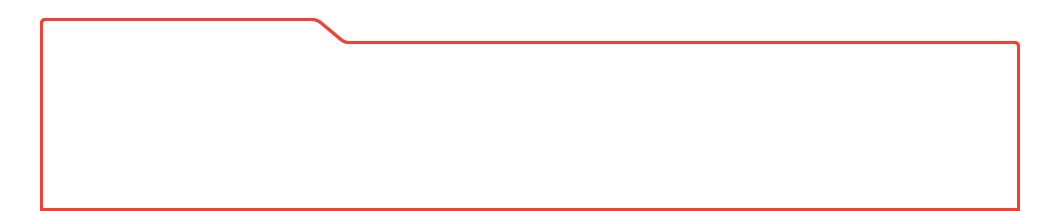
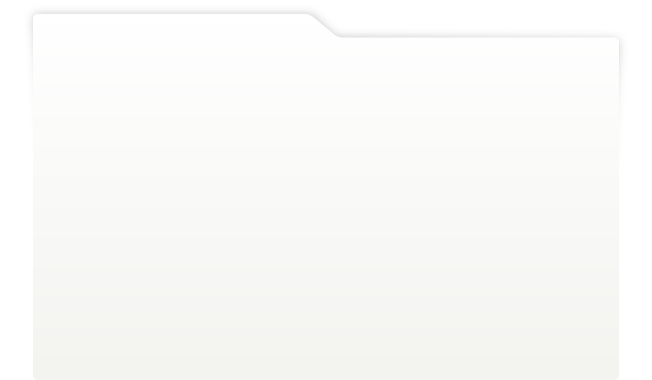
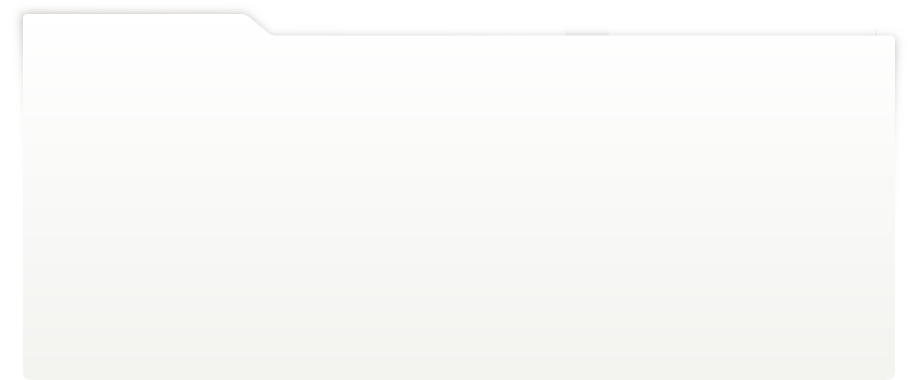
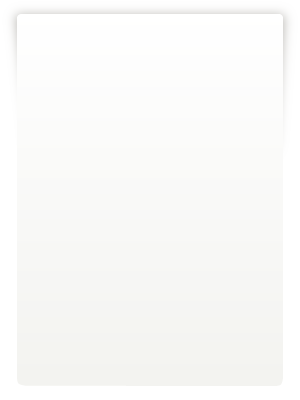
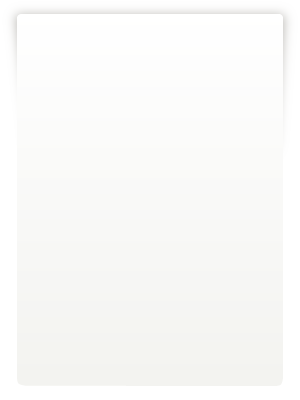
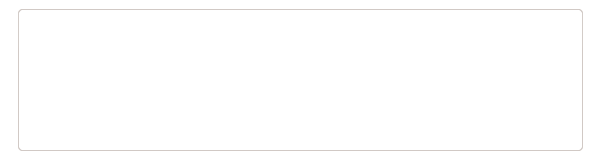
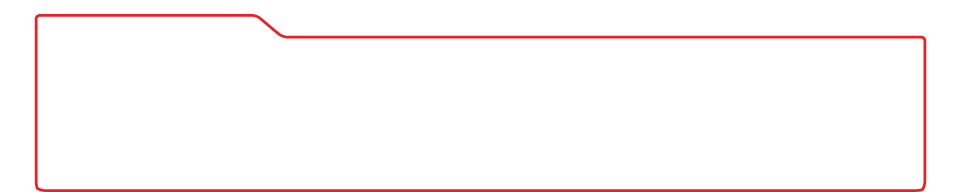
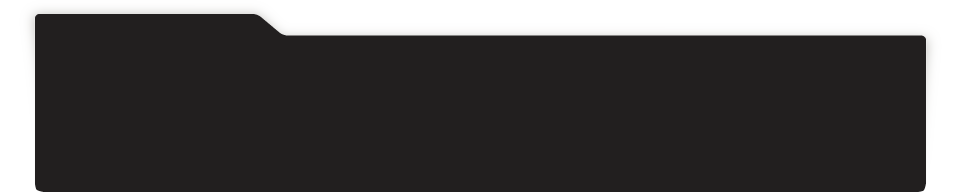
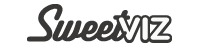
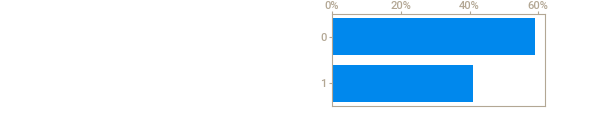
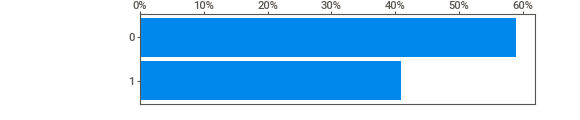
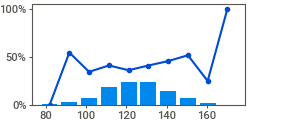
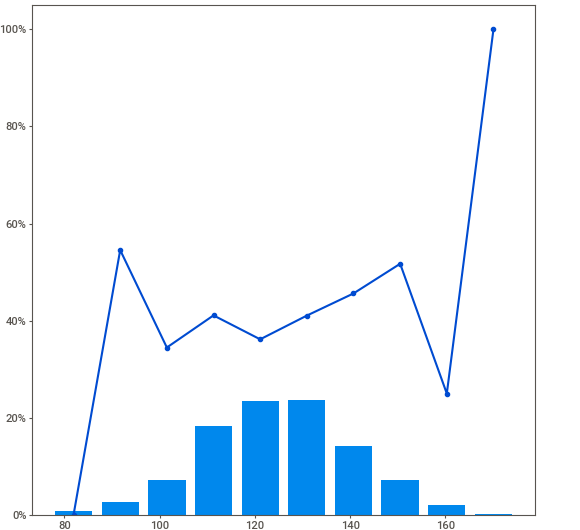
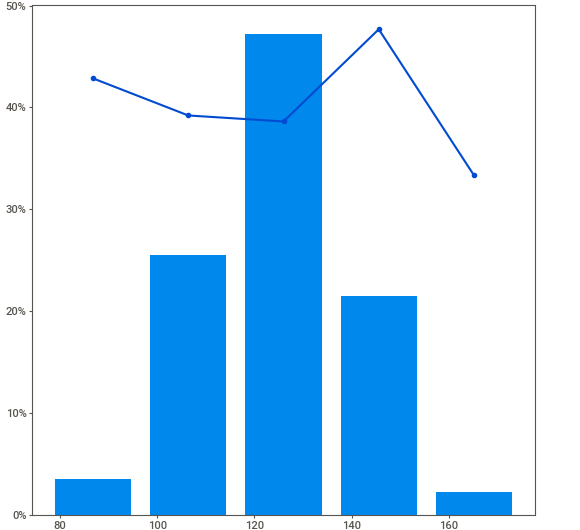
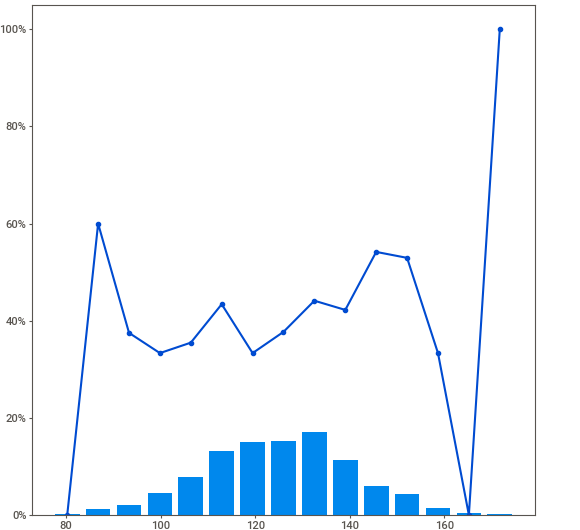
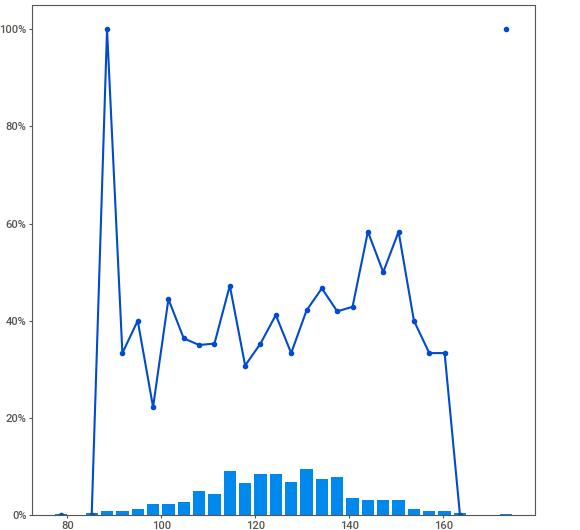
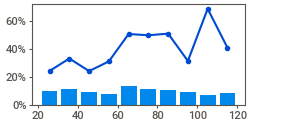
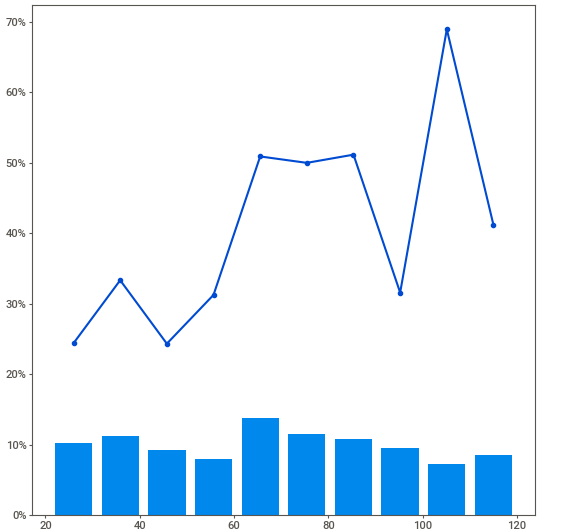
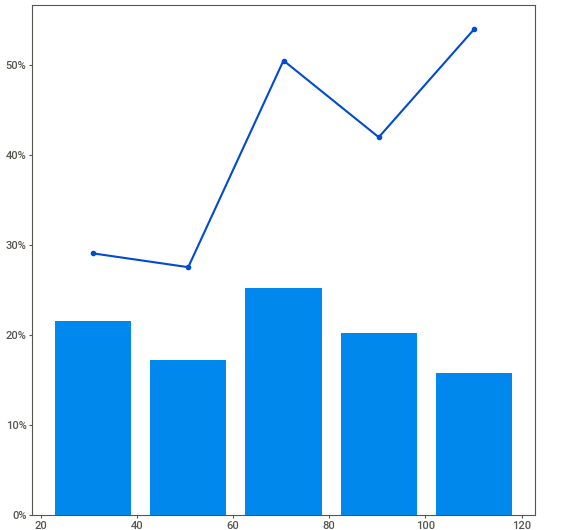
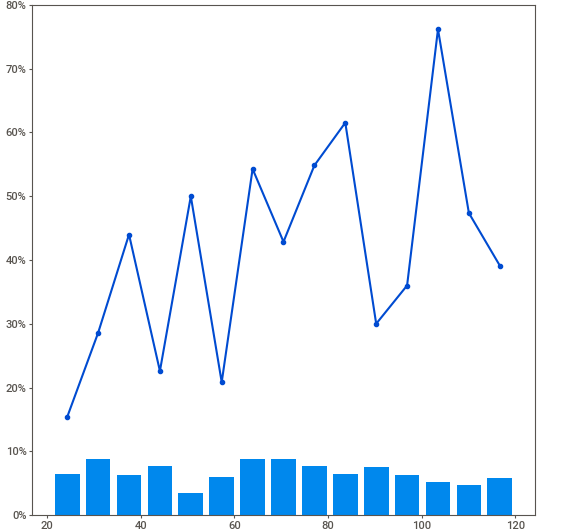
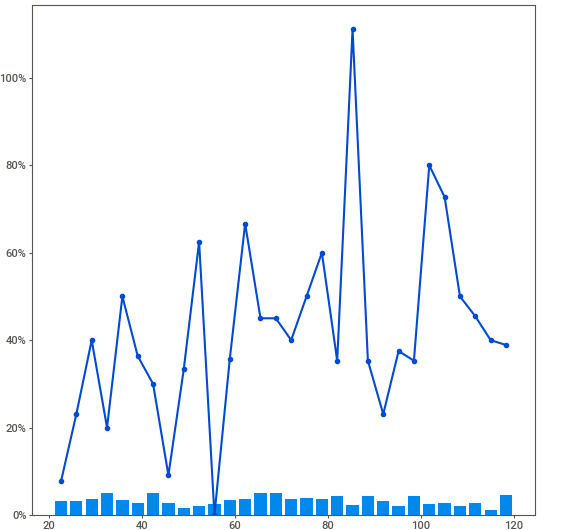
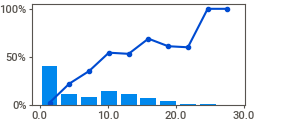
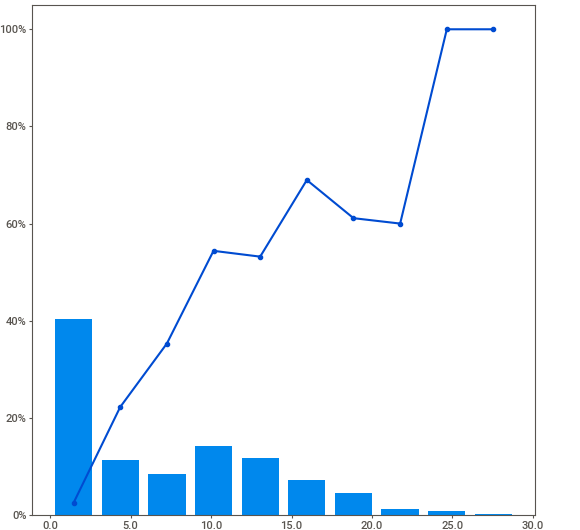
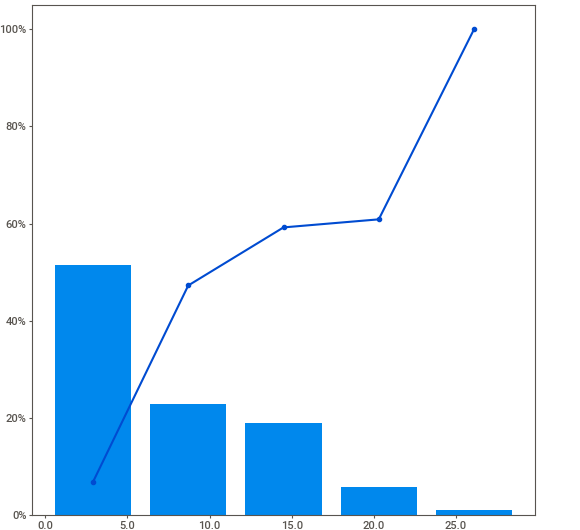
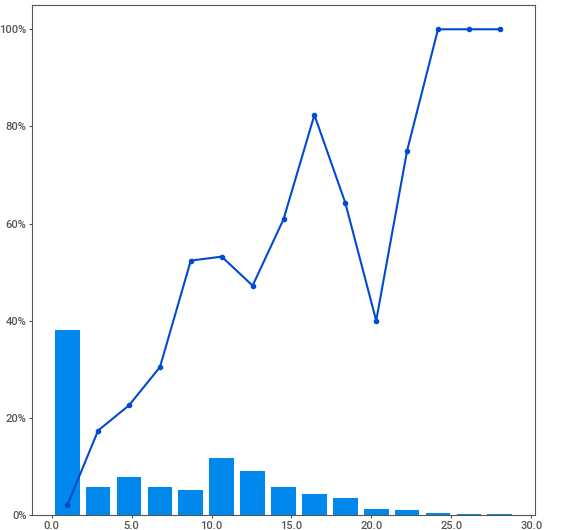
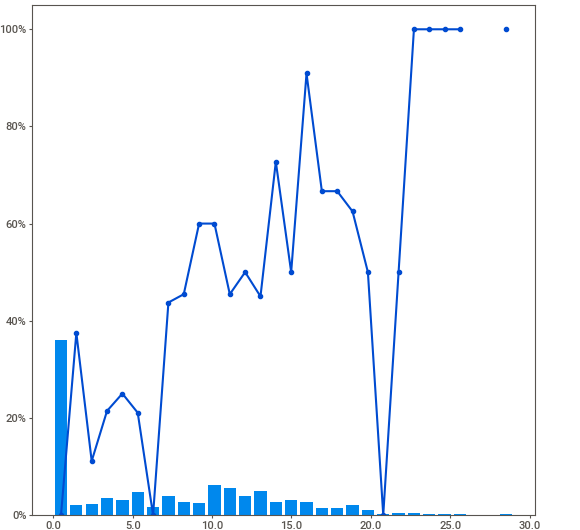
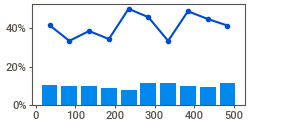
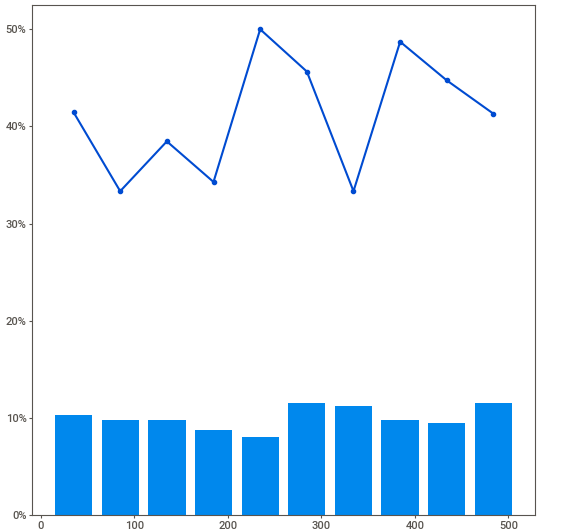
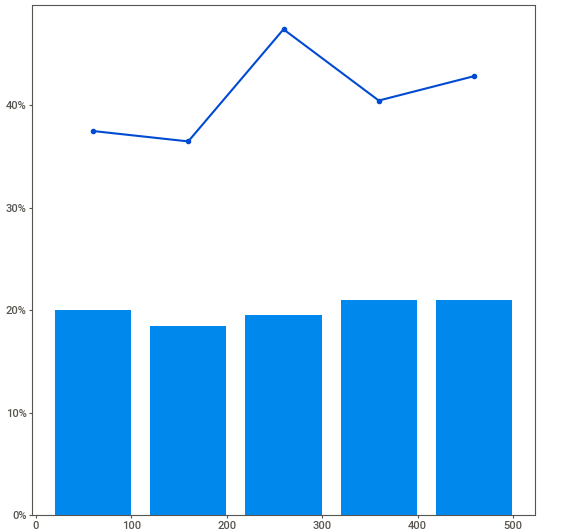
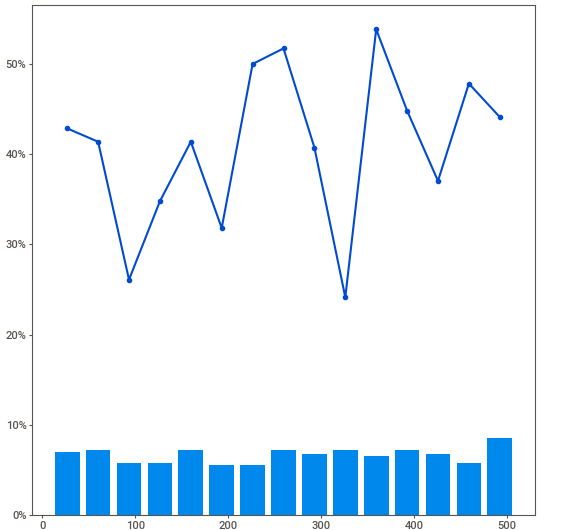
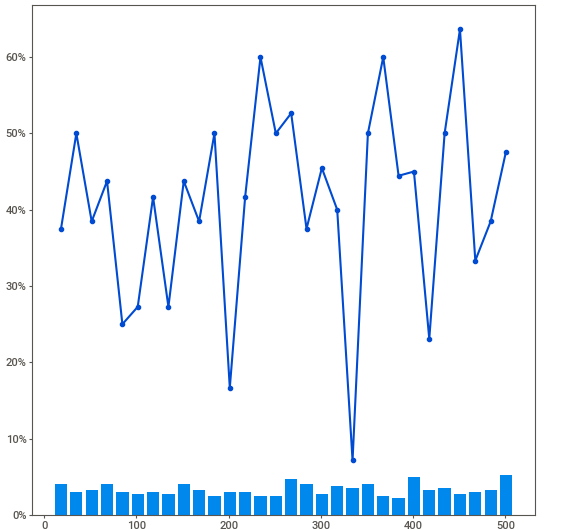
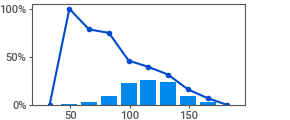
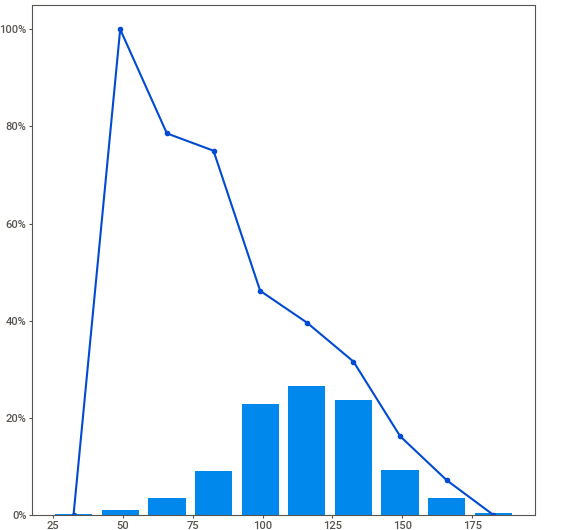
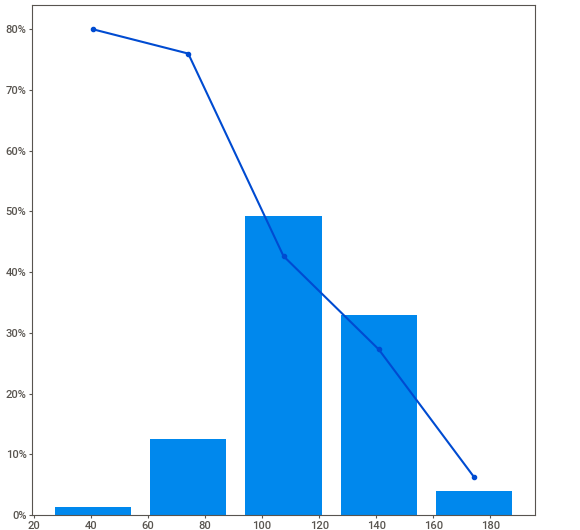
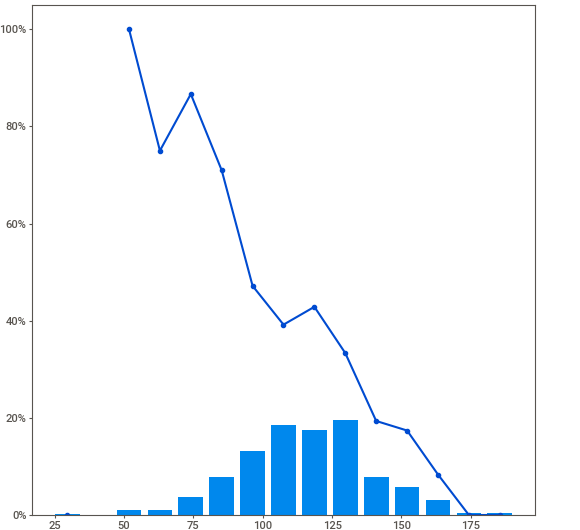
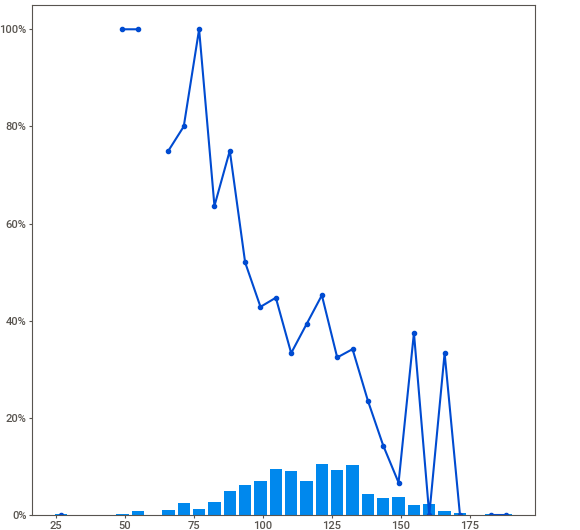
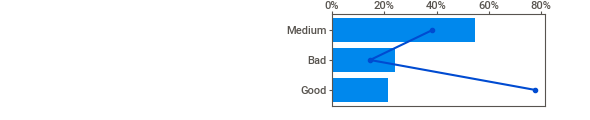
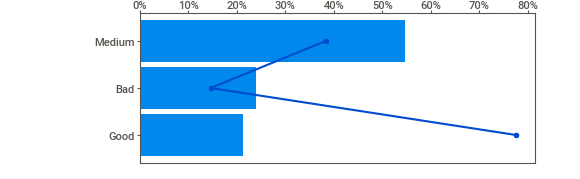
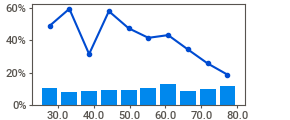
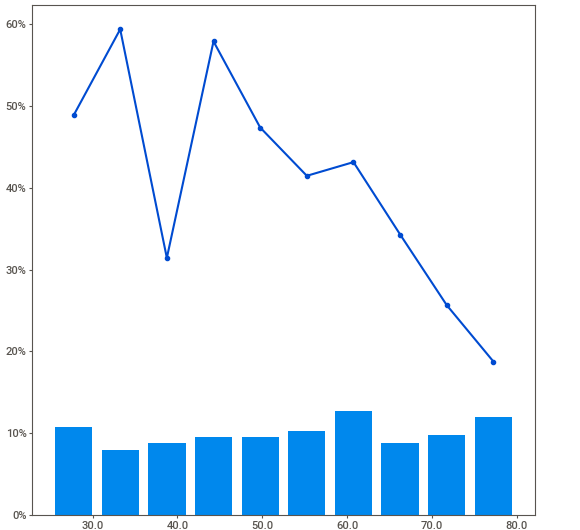
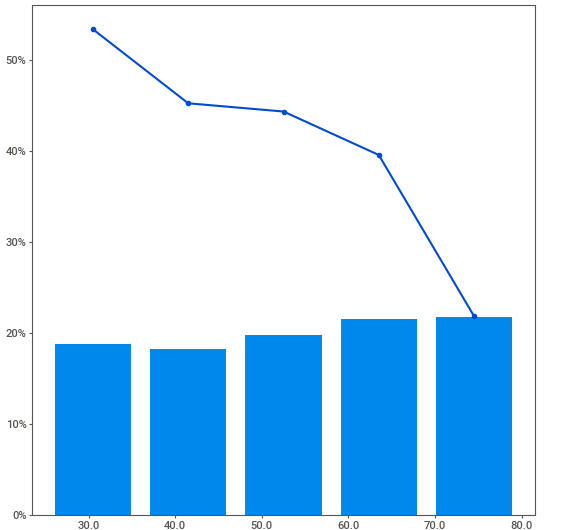
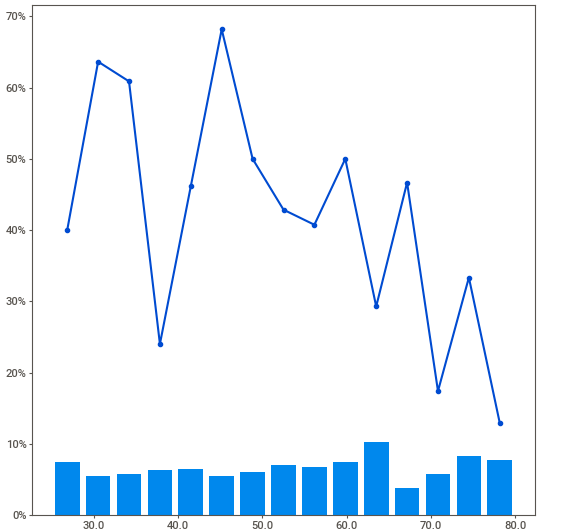
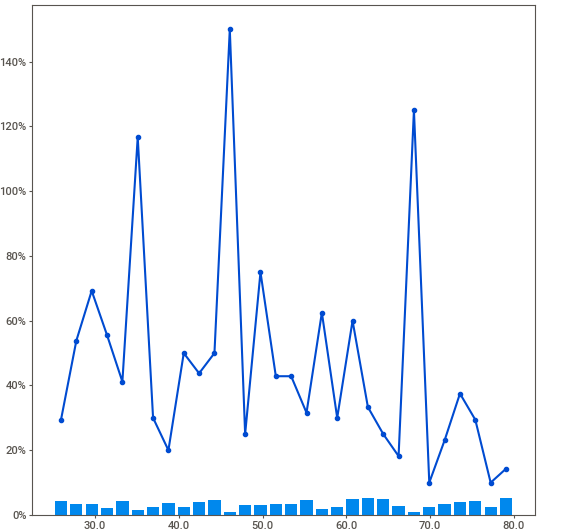
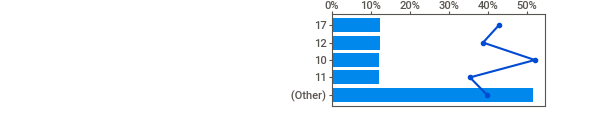
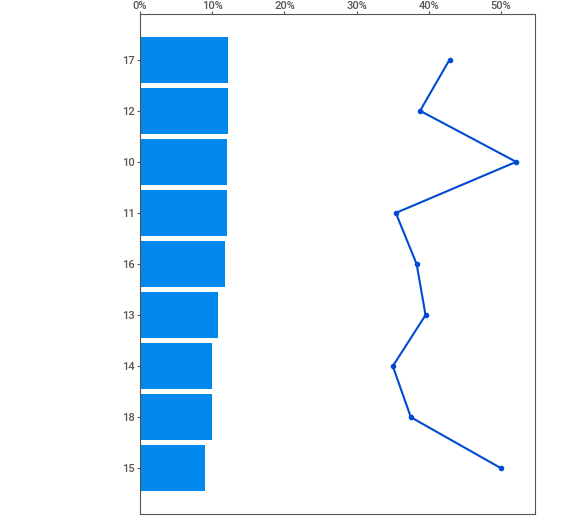
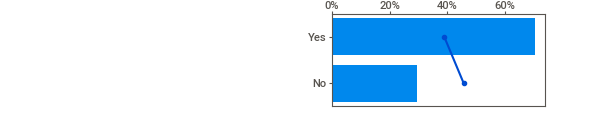
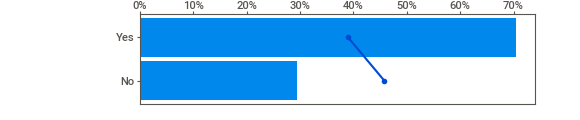
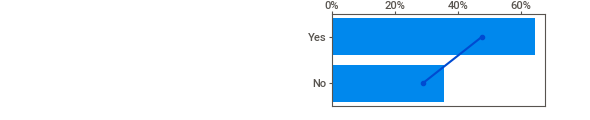
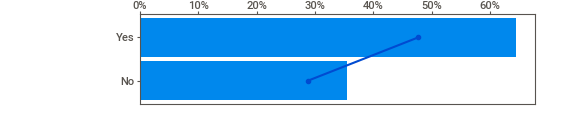
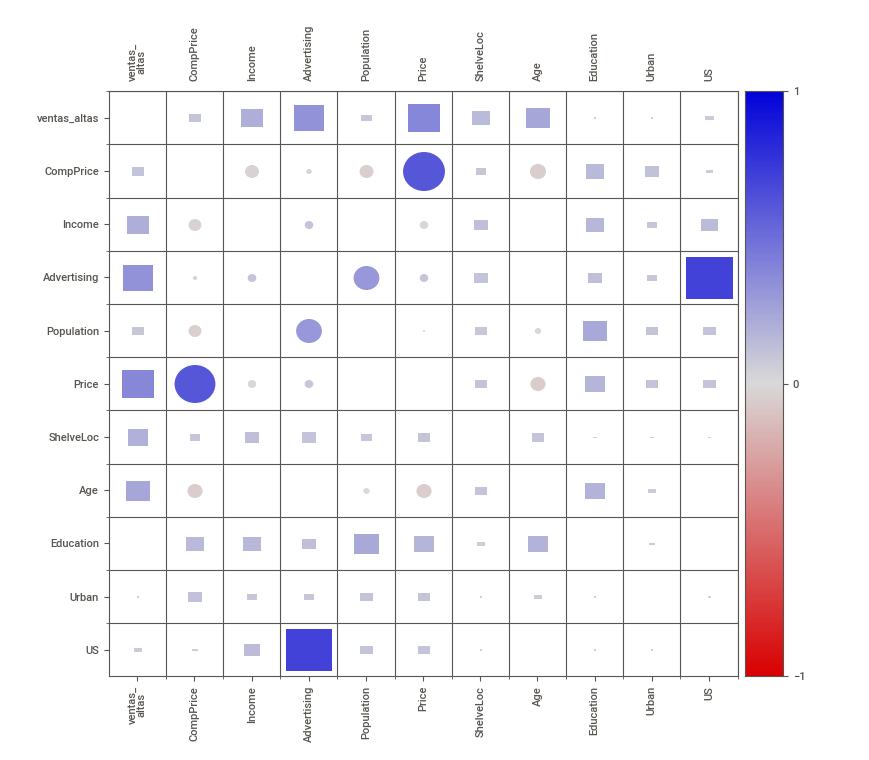
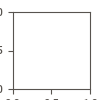

In [213]:
reporte1.show_html()
HTML("SWEETVIZ_REPORT.html")

## Ajuste del modelo


Se ajusta un árbol de clasificación empleando como variable respuesta `ventas_altas` y como predictores todas las variables disponibles. Se utilizan en primer lugar los hiperparámetros `max_depth=5` y `criterion='gini'`, el resto se dejan por defecto. Después, se aplica el proceso de pruning y se comparan los resultados frente al modelo inicial.

ojo en estos estos datos hay variables categóricas por lo que, antes de entrenar el modelo, es necesario aplicar one-hot-encoding.

In [214]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        datos1.drop(columns = 'ventas_altas'),
                                        datos1['ventas_altas'],
                                        random_state = 123, test_size=0.25
                                    )



In [215]:
X_train

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



CompPrice  Income  Advertising  Population  Price  Age  Education  \
170        128      39           12         356    118   71         10   
297        118      83           13         276    104   75         10   
148        110     119            0         384     97   72         14   
144        132      68            0         264    123   34         11   
12         122      35            2         393    136   62         18   
..         ...     ...          ...         ...    ...  ...        ...   
230        115      60            0         119    114   38         14   
98         122      77           24         382    127   36         16   
322        140      50           10         300    139   60         15   
382        121      28           19         315    121   66         14   
365        154      30            0         122    162   57         17   

     ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
170               0                 1          1       1  
297               0                 0          1       1  
148               0                 1          0       1  
144               1                 0          0       0  
12                0                 1          1       0  
..              ...               ...        ...     ...  
230               0                 0          0       0  
98                1                 0          0       1  
322               1                 0          1       1  
382               0                 1          1       1  
365               0                 1          0       0  

[300 rows x 11 columns]

In [216]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 170 to 365
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         300 non-null    int64
 1   Income            300 non-null    int64
 2   Advertising       300 non-null    int64
 3   Population        300 non-null    int64
 4   Price             300 non-null    int64
 5   Age               300 non-null    int64
 6   Education         300 non-null    int64
 7   ShelveLoc_Good    300 non-null    uint8
 8   ShelveLoc_Medium  300 non-null    uint8
 9   Urban_Yes         300 non-null    uint8
 10  US_Yes            300 non-null    uint8
dtypes: int64(7), uint8(4)
memory usage: 19.9 KB


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [217]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



DecisionTreeClassifier(max_depth=5, random_state=123)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Profundidad del árbol: 5
Número de nodos terminales: 23


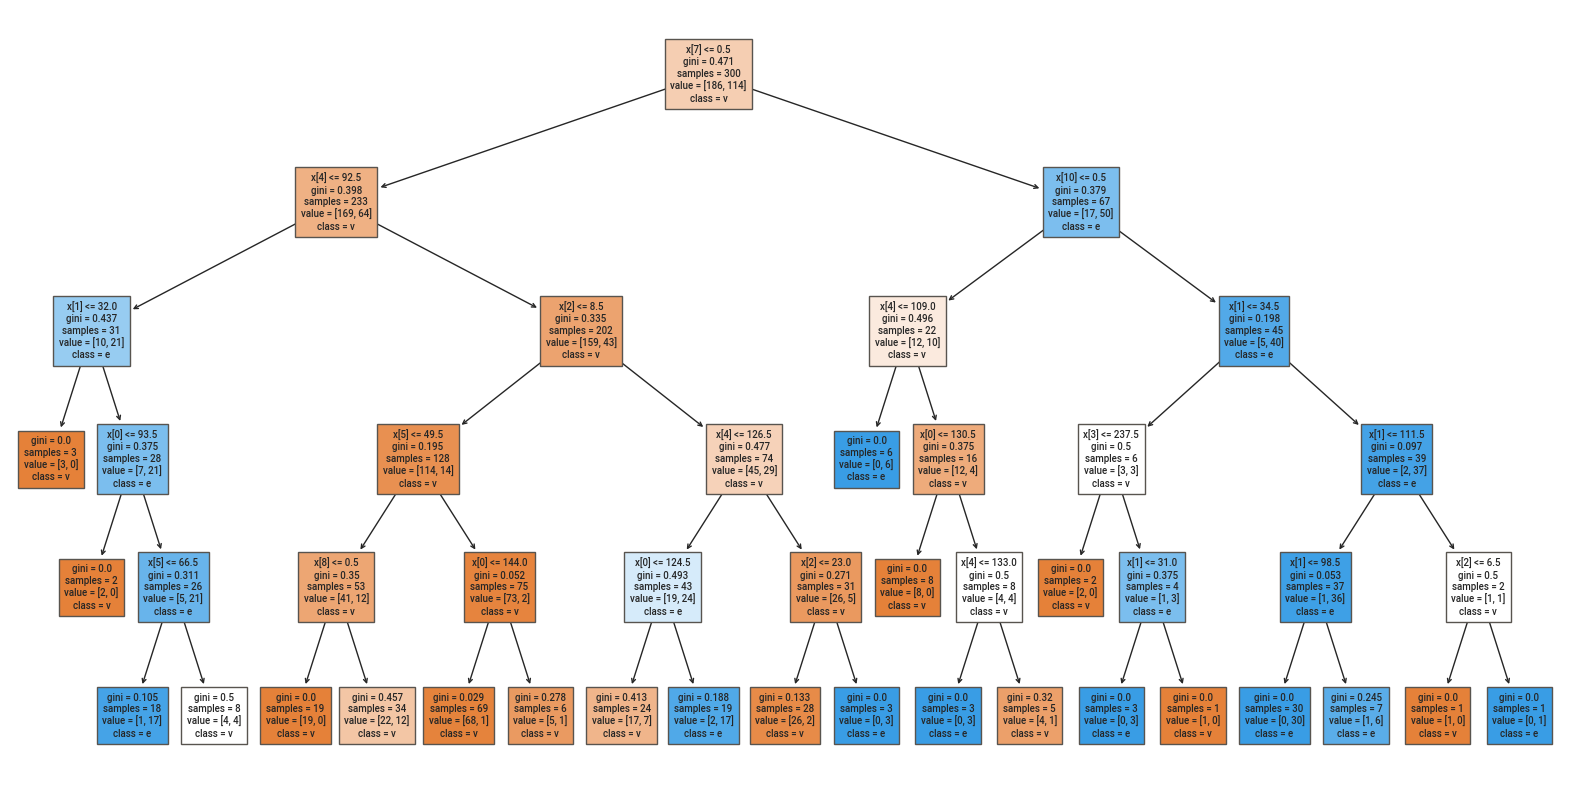

In [218]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            #feature_names = labels.tolist(),
            class_names   = 'ventas_altas',
            filled        = True,
            impurity      = True,
            fontsize      = 7,
            ax            = ax
       )

# Predicción y evaluación del modelo


Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [219]:
# Error de test del modelo
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test,)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[43,  7],
       [23, 27]])

In [220]:
print(classification_report(y_test, predicciones))


              precision    recall  f1-score   support

           0       0.65      0.86      0.74        50
           1       0.79      0.54      0.64        50

    accuracy                           0.70       100
   macro avg       0.72      0.70      0.69       100
weighted avg       0.72      0.70      0.69       100



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [221]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 70.0 %


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



El modelo inicial es capaz de predecir correctamente un 72 % de las observaciones del conjunto de test.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Podado del árbol (pruning)


Aunque inicialmente se ha empleado un valor de max_depth=5, este no tiene por qué ser el mejor valor. Con el objetivo de identificar la profundidad óptima que consigue reducir la varianza y aumentar la capacidad predictiva del modelo, se somete al árbol a un proceso de pruning.

In [222]:
np.linspace(0,5,20)

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



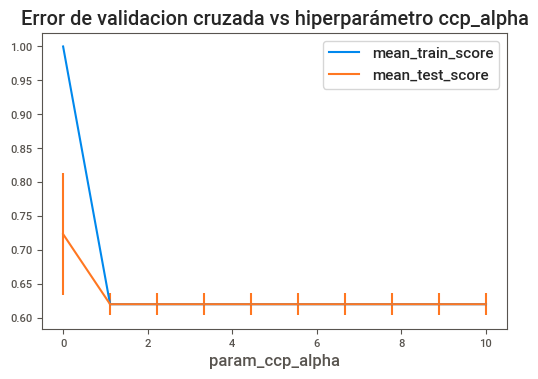

In [223]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha': np.linspace(0, 10, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [224]:
scores

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.008682      0.004184         0.003892        0.002240   
1       0.005787      0.001344         0.002838        0.000253   
2       0.005375      0.000307         0.003560        0.002242   
3       0.005129      0.000105         0.002917        0.000874   
4       0.005343      0.000186         0.003515        0.002358   
5       0.007813      0.004262         0.002946        0.000619   
6       0.005301      0.000317         0.002861        0.000942   
7       0.005120      0.000403         0.002689        0.000136   
8       0.005043      0.000303         0.002735        0.000678   
9       0.005787      0.002051         0.002655        0.000356   

  param_ccp_alpha                             params  split0_test_score  \
0             0.0                 {'ccp_alpha': 0.0}                0.7   
1        1.111111  {'ccp_alpha': 1.1111111111111112}                0.6   
2        2.222222  {'ccp_alpha': 2.2222222222222223}                0.6   
3        3.333333  {'ccp_alpha': 3.3333333333333335}                0.6   
4        4.444444   {'ccp_alpha': 4.444444444444445}                0.6   
5        5.555556   {'ccp_alpha': 5.555555555555555}                0.6   
6        6.666667   {'ccp_alpha': 6.666666666666667}                0.6   
7        7.777778   {'ccp_alpha': 7.777777777777779}                0.6   
8        8.888889    {'ccp_alpha': 8.88888888888889}                0.6   
9            10.0                {'ccp_alpha': 10.0}                0.6   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.666667                0.8           0.766667  ...   
1           0.600000                0.6           0.600000  ...   
2           0.600000                0.6           0.600000  ...   
3           0.600000                0.6           0.600000  ...   
4           0.600000                0.6           0.600000  ...   
5           0.600000                0.6           0.600000  ...   
6           0.600000                0.6           0.600000  ...   
7           0.600000                0.6           0.600000  ...   
8           0.600000                0.6           0.600000  ...   
9           0.600000                0.6           0.600000  ...   

   split2_train_score  split3_train_score  split4_train_score  \
0            1.000000            1.000000            1.000000   
1            0.622222            0.622222            0.618519   
2            0.622222            0.622222            0.618519   
3            0.622222            0.622222            0.618519   
4            0.622222            0.622222            0.618519   
5            0.622222            0.622222            0.618519   
6            0.622222            0.622222            0.618519   
7            0.622222            0.622222            0.618519   
8            0.622222            0.622222            0.618519   
9            0.622222            0.622222            0.618519   

   split5_train_score  split6_train_score  split7_train_score  \
0            1.000000            1.000000            1.000000   
1            0.618519            0.618519            0.618519   
2            0.618519            0.618519            0.618519   
3            0.618519            0.618519            0.618519   
4            0.618519            0.618519            0.618519   
5            0.618519            0.618519            0.618519   
6            0.618519            0.618519            0.618519   
7            0.618519            0.618519            0.618519   
8            0.618519            0.618519            0.618519   
9            0.618519            0.618519            0.618519   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            1.000000            1.000000              1.00         0.000000  
1            0.618519            0.618519              0.62         0.001814  
2            0.618519           

In [225]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'ccp_alpha': 0.0}

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos. Si en el GridSearchCV() se indica refit=True, este reentrenamiento se hace automáticamente y el modelo resultante se encuentra almacenado en `.best_estimator_.`

In [226]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 9
Número de nodos terminales: 49


In [227]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 72.0 %


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [228]:
confusion_matrix(y_test, predicciones)

array([[39, 11],
       [17, 33]])

In [229]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        50
           1       0.75      0.66      0.70        50

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### Importancia de predictores


La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el índice Gini, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [230]:
datos1.columns

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ventas_altas', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_Yes', 'US_Yes'],
      dtype='object')

In [231]:
X_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

In [232]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
4              Price     0.263088
7     ShelveLoc_Good     0.163736
0          CompPrice     0.141044
1             Income     0.124665
2        Advertising     0.097012
10            US_Yes     0.052091
5                Age     0.046339
8   ShelveLoc_Medium     0.042869
3         Population     0.034781
6          Education     0.017869
9          Urban_Yes     0.016506

### Predicción de probabilidades


La mayoría de implementaciones de los modelos basados en árboles, entre ellas la de scikit-learn, permiten predicir probabilidades cuando se trata de problemas de clasificación. Es importante entender cómo se calculan estos valores para interpretarlos y utilizarlos correctamente.

En el ejemplo anterior, al aplicar `.predict()` se devuelve  0  (ventas elevadas) o  1 (ventas bajas) para cada observación de test. Sin embargo, no se dispone de ningún tipo de información sobre la seguridad con la que el modelo realiza esta asignación. Con `.predict_proba()`, en lugar de una clasificación, se obtiene la probabilidad con la que el modelo considera que cada observación puede pertenecer a cada una de las clases.

In [233]:
# Predicción de probabilidades
#-------------------------------------------------------------------------------
predicciones = modelo.predict_proba(X = X_test)
predicciones

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.10526316, 0.89473684],
       [0.05555556, 0.94444444],
       [0.10526316, 0.89473684],
       [0.5       , 0.5       ],
       [0.92857143, 0.07142857],
       [0.05555556, 0.94444444],
       [0.98550725, 0.01449275],
       [0.70833333, 0.29166667],
       [0.98550725, 0.01449275],
       [0.98550725, 0.01449275],
       [0.64705882, 0.35294118],
       [0.        , 1.        ],
       [0.98550725, 0.01449275],
       [0.64705882, 0.35294118],
       [0.10526316, 0.89473684],
       [0.98550725, 0.01449275],
       [0.83333333, 0.16666667],
       [0.98550725, 0.01449275],
       [0.98550725, 0.01449275],
       [0.70833333, 0.29166667],
       [0.05555556, 0.94444444],
       [0.14285714, 0.85714286],
       [0.83333333, 0.16666667],
       [0.98550725, 0.01449275],
       [0.        , 1.        ],
       [0.98550725, 0.01449275],
       [0.64705882, 0.35294118],
       [0.70833333, 0.29166667],
       [1.

El resultado de `.predict_proba()` es un array con una fila por observación y tantas columnas como clases tenga la variable respuesta. El valor de la primera columna se corresponde con la probabilidad, acorde al modelo, de que la observación pertenezca a la clase 0, y así sucesivamente. El valor de probabilidad mostrado para cada predicción se corresponde con la fracción de observaciones de cada classe en el nodo terminal al que ha llegado la observación predicha.

Por defecto, `.predict()` asigna cada nueva observación a la clase con mayor probabilidad (en caso de empate se asigna de forma aleatoria). Sin embargo, este no tiene por qué ser el comportamiento deseado en todos los casos.

In [234]:
# Clasificación empleando la clase de mayor probabilidad
# ------------------------------------------------------------------------------
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0         1  clasificacion_default_0.5
0  0.000000  1.000000                          1
1  1.000000  0.000000                          0
2  0.105263  0.894737                          1
3  0.055556  0.944444                          1
4  0.105263  0.894737                          1
5  0.500000  0.500000                          1
6  0.928571  0.071429                          0
7  0.055556  0.944444                          1
8  0.985507  0.014493                          0
9  0.708333  0.291667                          0

Supóngase el siguiente escenario: la campaña de navidad se aproxima y los propietarios de la cadena quieren duplicar el stock de artículos en aquellas tiendas de las que se prevee que tengan ventas elevadas. Como el transporte de este material hasta las tiendas supone un coste elevado, el director quiere limitar esta estrategia únicamente a tiendas para las que se tenga mucha seguridad de que van conseguir muchas ventas.

Si se dispone de las probabilidades, se puede establecer un punto de corte concreto, por ejemplo, considerando únicamente como clase  1  (ventas altas) aquellas tiendas cuya predicción para esta clase sea superior al 0.8 (80%). De esta forma, la clasificación final se ajusta mejor a las necesidades del caso de uso.

In [235]:
# Clasificación final empleando un threshold de 0.8 para la clase 1.
# ------------------------------------------------------------------------------
df_predicciones['clasificacion_custom_0.8'] = np.where(df_predicciones['1'] > 0.8, 1, 0)
df_predicciones.iloc[5:40, :]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0         1  clasificacion_default_0.5  clasificacion_custom_0.8
5   0.500000  0.500000                          1                         0
6   0.928571  0.071429                          0                         0
7   0.055556  0.944444                          1                         1
8   0.985507  0.014493                          0                         0
9   0.708333  0.291667                          0                         0
10  0.985507  0.014493                          0                         0
11  0.985507  0.014493                          0                         0
12  0.647059  0.352941                          0                         0
13  0.000000  1.000000                          1                         1
14  0.985507  0.014493                          0                         0
15  0.647059  0.352941                          0                         0
16  0.105263  0.894737                          1                         1
17  0.985507  0.014493                          0                         0
18  0.833333  0.166667                          0                         0
19  0.985507  0.014493                          0                         0
20  0.985507  0.014493                          0                         0
21  0.708333  0.291667                          0                         0
22  0.055556  0.944444                          1                         1
23  0.142857  0.857143                          1                         1
24  0.833333  0.166667                          0                         0
25  0.985507  0.014493                          0                         0
26  0.000000  1.000000                          1                         1
27  0.985507  0.014493                          0                         0
28  0.647059  0.352941                          0                         0
29  0.708333  0.291667                          0                         0
30  1.000000  0.000000                          0                         0
31  0.985507  0.014493                          0                         0
32  0.985507  0.014493                          0                         0
33  0.000000  1.000000                          1                         1
34  0.105263  0.894737                          1                         1
35  0.985507  0.014493                          0                         0
36  0.985507  0.014493                          0                         0
37  0.708333  0.291667                          0                         0
38  1.000000  0.000000                          0                         0
39  0.000000  1.000000                          1                         1

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b01f3fd-002a-43ad-8b2f-83f22b9a4ee6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>